<a href="https://colab.research.google.com/github/Joeyearim/hello_/blob/main/%EC%A1%B0%EC%98%88%EB%A6%BC_%EC%84%B9%EC%85%982(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#goal : 수년간 글로벌 어류 생산은 어떻게 관리되고 있을까?
 - 과연 글로벌 어류 생산과 남획 및 폐기는 관련이 있을까?


 기획배경)  


넷플릭스 'seaspiracy'
 :: 과연, 플라스틱 빨대가 오션을 오염시키고 있을까?  

  이에 씨스파라시는 남획의 실태에 대해 폭로하며, 사실상 99.7%의 쓰레기는 야생 포획 과정에서 생성된다고 주장합니다.



  

  

  
또, 지난 50년 동안 전 세계 어류 및 해산물 생산량이 4배 증가했습니다.  

이 기간 동안 세계 인구가 두 배 이상 증가했을 뿐만 아니라 현재 평균적인 사람은 반세기 전보다 거의 두 배나 많은 해산물을 섭취합니다.


  
    


이것은 전 세계적으로 어류 자원에 대한 압력을 증가시켰습니다.   

전 세계적으로 남획된 어류 자원의 비율(즉, 인구 수준을 유지하기 위해 번식할 수 있는 것보다 더 빨리 어획량을 잡는다는 의미)은 1980년대 이후 두 배 이상 증가했으며,  


이는 현재 수준의 야생 어획량을 지속할 수 없음을 의미합니다.


한 가지 혁신은 자연산 어획량에 대한 압박을 완화하는 데 도움이 되었습니다.  


이에 우리는 양식업과 수년간 글로벌 여류 생산이 어떻게 관리되고 있는지 확인해보겠습니다.



우리는 '수년간 글로벌 어류 생산은 어떻게 관리되고 있을까?'에 대하여 대답하기 이전,  

탐색을 위한 새로운 가설을 생성할 수 있습니다.

#귀무 가설 : 현 어류 포획량은 남획과 연관이 없거나 알 수 없다.
#대립 가설: 현 어류 포획량은 남획과 연관이 깊다.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving aquaculture-farmed-fish-production.csv to aquaculture-farmed-fish-production.csv
Saving capture-fisheries-vs-aquaculture.csv to capture-fisheries-vs-aquaculture.csv
Saving capture-fishery-production.csv to capture-fishery-production.csv
Saving fish-and-seafood-consumption-per-capita.csv to fish-and-seafood-consumption-per-capita.csv
Saving fish-stocks-within-sustainable-levels.csv to fish-stocks-within-sustainable-levels.csv
Saving global-fishery-catch-by-sector.csv to global-fishery-catch-by-sector.csv
Saving seafood-and-fish-production-thousand-tonnes.csv to seafood-and-fish-production-thousand-tonnes.csv


In [5]:
import numpy as np


In [6]:
import pandas as pd
df=pd.read_csv('aquaculture-farmed-fish-production.csv')
df1=pd.read_csv('capture-fisheries-vs-aquaculture.csv')
df2=pd.read_csv('capture-fishery-production.csv')
df3=pd.read_csv('fish-and-seafood-consumption-per-capita.csv')
df4=pd.read_csv('fish-stocks-within-sustainable-levels.csv')
df5=pd.read_csv('global-fishery-catch-by-sector.csv')
df6=pd.read_csv('seafood-and-fish-production-thousand-tonnes.csv')


#간단히 EDA 과정을 진행합니다.
현재, df " 양식 관련 데이터"를 확인하겠습니다.

In [7]:
#중복 값이 있는지 확인합니다.
df.duplicated().sum()

0

In [8]:
#결측치가 있는지 확인합니다.
#code는 후 드랍될 컬럼입니다.
df.isnull().sum()

Entity                                     0
Code                                    2773
Year                                       0
Aquaculture production (metric tons)       0
dtype: int64

In [9]:
# df :: 연간 및 국가 또는 지역별 양식(생산) 수준
# 전체적으로 Df~df5를 확인 시, 데이터를 합치기에 년도가 다른 것으로 확인됩니다. 이에, 1969이전 년도가 있다면 drop 합니다.
df['Year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968])

In [10]:
# df " 연도 유니크 값이 크기 때문에, 5년 단위로 데이터를 묶어주도록 합니다.

conditions = [(df['Year'] <= 1975),
              (df['Year'] > 1975) & (df['Year'] <= 1980),
              (df['Year'] > 1980) & (df['Year'] <= 1985),
              (df['Year'] > 1985) & (df['Year'] <= 1990),
              (df['Year'] > 1990) & (df['Year'] <= 1995),
              (df['Year'] > 1995) & (df['Year'] <= 2000),
              (df['Year'] > 2000) & (df['Year'] <= 2005),
              (df['Year'] > 2005) & (df['Year'] <= 2010),
              (df['Year'] > 2010) & (df['Year'] <= 2015),
              (df['Year'] > 2015) & (df['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020'] # 라벨
df['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

In [11]:
#새로운 컬럼을 생성했습니다.
df['age']

0            ~1975
1            ~1975
2            ~1975
3            ~1975
4            ~1975
           ...    
11652    2010~2015
11653    2010~2015
11654    2015~2020
11655    2015~2020
11656    2015~2020
Name: age, Length: 11657, dtype: object

In [12]:
df['age'].value_counts()

~1975        2365
2010~2015    1192
2005~2010    1169
2000~2005    1138
1995~2000    1121
1990~1995    1108
1985~1990    1049
1980~1985     925
1975~1980     871
2015~2020     719
Name: age, dtype: int64

In [13]:
df # 새로운 컬럼이 잘 저장되었음을 알 수 있습니다.

,Entity,Code,Year,Aquaculture production (metric tons),age
0,Afghanistan,AFG,1969,60.0,~1975
1,Afghanistan,AFG,1970,60.0,~1975
2,Afghanistan,AFG,1971,60.0,~1975
3,Afghanistan,AFG,1972,60.0,~1975
4,Afghanistan,AFG,1973,60.0,~1975
...,...,...,...,...,...
11652,Zimbabwe,ZWE,2014,10600.0,2010~2015
11653,Zimbabwe,ZWE,2015,10600.0,2010~2015
11654,Zimbabwe,ZWE,2016,10085.0,2015~2020
11655,Zimbabwe,ZWE,2017,10300.0,2015~2020


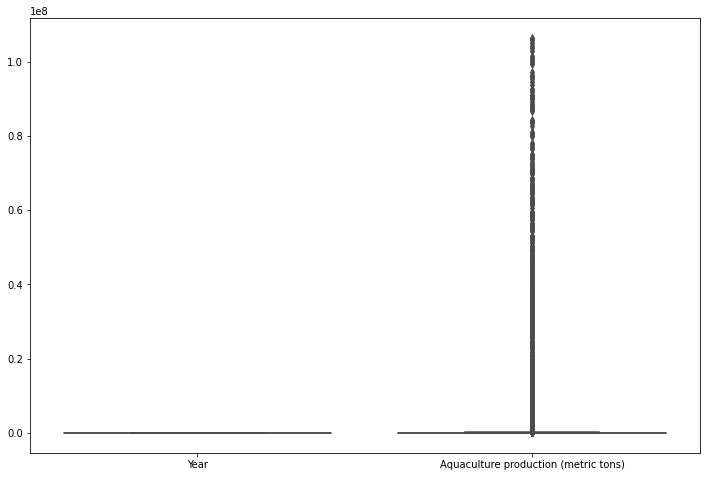

In [14]:
##df의 이상치 확인을 위한 박스플롯을 그렸습니다. 박스플롯을 보았을때 특별하게 이상치를 갖는 데이터로는 보이지 않습니다.
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(data=df, color='r')
plt.show()

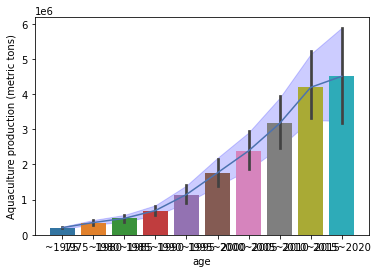

In [15]:
# 5년별 총 양식 평균을 시각화로 확인해보겠습니다.

import seaborn as sns

sns.barplot(x= 'age',
        y= 'Aquaculture production (metric tons)', data= df) 
sns.lineplot( x= 'age', data = df,
        y= 'Aquaculture production (metric tons)', color = 'b')

sns.set(rc={'figure.figsize':(20,10)})



## 다행스럽게도 양식량이 전 세계적으로 늘고 있음을 알 수 있습니다.  
이를 더 자세히 확인하기 위해서 지역별로 양식량의 차이가 얼마나 나는지 확인하겠습니다.



In [16]:
# df의 나라 데이터를 자세히 확인해보겠습니다.
df['Entity'] 

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
11652       Zimbabwe
11653       Zimbabwe
11654       Zimbabwe
11655       Zimbabwe
11656       Zimbabwe
Name: Entity, Length: 11657, dtype: object

In [17]:
df['Entity'].unique() # 유니크를 통해 어떠한 데이터들이 들어가 있는지 확인하겠습니다.

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Angola', 'Antigua and Barbuda', 'Arab World',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean Small States', 'Central African Republic',
       'Central Europe and the Baltics', 'Chad', 'Channel Islands',
       'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD

In [18]:
df['ground'] = 'Europe1' # 다양한 나라들을 대륙별로 정리하여 새로운 컬럼 'ground' 에 넣어줍니다.

In [19]:
### 유럽 1 

Europe = ('Belarus','Belgium','BosniaandHerzegovina','Bulgaria','CentralEuropeandtheBaltics','ChannelIslands','Croatia','Czechia','Denmark','Estonia','Euroarea','Europe&CentralAsia','urope&CentralAsia(IDA&IBRD)','Europe&CentralAsia(excludinghighincome)','FaeroeIslands','Finland','France','FrenchPolynesia','Germany','Greece','Hungary','Iceland','Malta','Lithuania','Netherlands','UnitedKingdom','TurksandCaicosIslands','Sweden','Switzerland','Tajikistan','Spain','SolomonIslands','Slovenia','Slovakia','Singapore','Serbia','Romania','Portugal','Poland','Montenegro','Moldova','Ireland','Italy','Latvia','Norway','NorthMacedonia')
Europe1 = df[df['Entity'].isin(Europe)]
Europe1
Europe1=Europe1.sort_values(by=['Year'])
Europe1


,Entity,Code,Year,Aquaculture production (metric tons),age,ground
3329,France,FRA,1960,111100.000000,~1975,Europe1
10174,Sweden,SWE,1960,510.000000,~1975,Europe1
2154,Denmark,DNK,1960,6045.000000,~1975,Europe1
9785,Spain,ESP,1960,6300.000000,~1975,Europe1
1146,Bulgaria,BGR,1960,900.000000,~1975,Europe1
...,...,...,...,...,...,...
2212,Denmark,DNK,2018,36453.000000,2015~2020,Europe1
8596,Portugal,PRT,2018,11814.295898,2015~2020,Europe1
4922,Ireland,IRL,2018,36895.898438,2015~2020,Europe1
2748,Estonia,EST,2018,943.661011,2015~2020,Europe1


In [20]:
### 유럽 2
Europe1.sort_values(by=['age'])
Europe1['age'].unique()

array(['~1975', '1975~1980', '1980~1985', '1985~1990', '1990~1995',
       '1995~2000', '2000~2005', '2005~2010', '2010~2015', '2015~2020'],
      dtype=object)

In [21]:
### 유럽 3


conditions = [(Europe1['Year'] <= 1975),
              (Europe1['Year'] > 1975) & (Europe1['Year'] <= 1980),
              (Europe1['Year'] > 1980) & (Europe1['Year'] <= 1985),
              (Europe1['Year'] > 1985) & (Europe1['Year'] <= 1990),
              (Europe1['Year'] > 1990) & (Europe1['Year'] <= 1995),
              (Europe1['Year'] > 1995) & (Europe1['Year'] <= 2000),
              (Europe1['Year'] > 2000) & (Europe1['Year'] <= 2005),
              (Europe1['Year'] > 2005) & (Europe1['Year'] <= 2010),
              (Europe1['Year'] > 2010) & (Europe1['Year'] <= 2015),
              (Europe1['Year'] > 2015) & (Europe1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
Europe1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

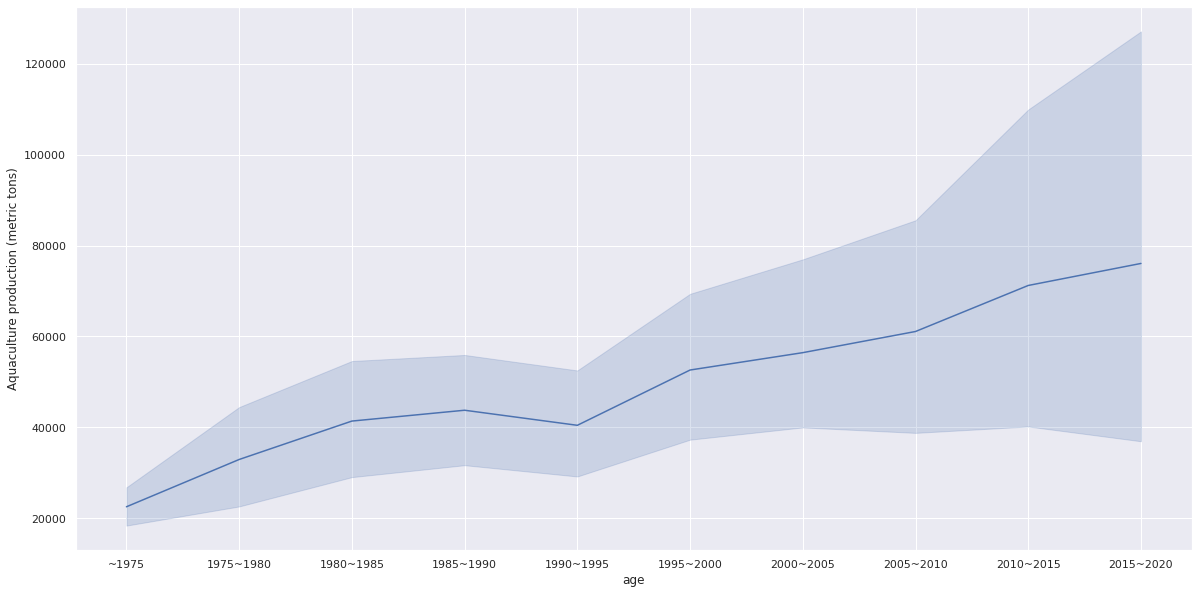

In [22]:
### 유럽 4

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = Europe1,
        y= 'Aquaculture production (metric tons)', color = 'b')
sns.set(rc={'figure.figsize':(20,10)})

In [23]:
df['ground'] = 'Oceania1' 

In [24]:
# 오세아니아 1

Oceania =  ('Fiji','Vanuatu','Kiribati','MarshallIslands','Tonga','SolomonIslands','Samoa','Pacificislandsmallstates','NorthernMarianaIslands','NewZealand','NewCaledonia???“Fragileandconflictaffectedsituations','Heavilyindebtedpoorcountries(HIPC)','Highincome’','IBRDonly','IDA&IBRDtotal’','IDAblend','IDAonly','IDAtotal')
Oceania1 = df[df['Entity'].isin(Oceania)]
Oceania1

,Entity,Code,Year,Aquaculture production (metric tons),age,ground
3152,Fiji,FJI,1960,0.000000,~1975,Oceania1
3153,Fiji,FJI,1961,0.000000,~1975,Oceania1
3154,Fiji,FJI,1962,0.000000,~1975,Oceania1
3155,Fiji,FJI,1963,0.000000,~1975,Oceania1
3156,Fiji,FJI,1964,0.000000,~1975,Oceania1
...,...,...,...,...,...,...
11322,Vanuatu,VUT,2014,79.697701,2010~2015,Oceania1
11323,Vanuatu,VUT,2015,11.540999,2010~2015,Oceania1
11324,Vanuatu,VUT,2016,15.702499,2015~2020,Oceania1
11325,Vanuatu,VUT,2017,17.047001,2015~2020,Oceania1


In [25]:
# 오세아니아 2

conditions = [(Oceania1['Year'] <= 1975),
              (Oceania1['Year'] > 1975) & (Oceania1['Year'] <= 1980),
              (Oceania1['Year'] > 1980) & (Oceania1['Year'] <= 1985),
              (Oceania1['Year'] > 1985) & (Oceania1['Year'] <= 1990),
              (Oceania1['Year'] > 1990) & (Oceania1['Year'] <= 1995),
              (Oceania1['Year'] > 1995) & (Oceania1['Year'] <= 2000),
              (Oceania1['Year'] > 2000) & (Oceania1['Year'] <= 2005),
              (Oceania1['Year'] > 2005) & (Oceania1['Year'] <= 2010),
              (Oceania1['Year'] > 2010) & (Oceania1['Year'] <= 2015),
              (Oceania1['Year'] > 2015) & (Oceania1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
Oceania1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [26]:
# 오세아니아 3

Oceania1

,Entity,Code,Year,Aquaculture production (metric tons),age,ground
3152,Fiji,FJI,1960,0.000000,~1975,Oceania1
3153,Fiji,FJI,1961,0.000000,~1975,Oceania1
3154,Fiji,FJI,1962,0.000000,~1975,Oceania1
3155,Fiji,FJI,1963,0.000000,~1975,Oceania1
3156,Fiji,FJI,1964,0.000000,~1975,Oceania1
...,...,...,...,...,...,...
11322,Vanuatu,VUT,2014,79.697701,2010~2015,Oceania1
11323,Vanuatu,VUT,2015,11.540999,2010~2015,Oceania1
11324,Vanuatu,VUT,2016,15.702499,2015~2020,Oceania1
11325,Vanuatu,VUT,2017,17.047001,2015~2020,Oceania1


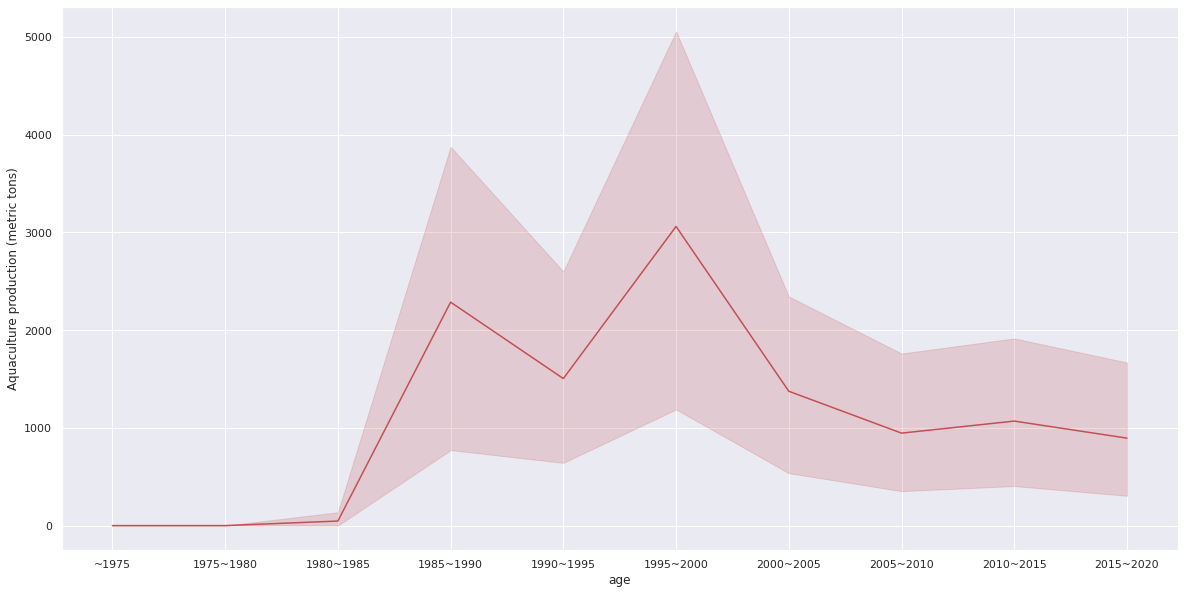

In [27]:
# 오세아니아 4

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = Oceania1,
        y= 'Aquaculture production (metric tons)', color = 'r')
sns.set(rc={'figure.figsize':(20,10)})

In [28]:
df['ground'] = 'Asia1' 

In [29]:
#아시아 1

import re

Asia = ['Bahrain','Azerbaijan','Bangladesh','Bhutan','BritishVirginIslands','Brunei','Cambodia','China','Cyprus','DominicanRepublic','EastAsia&Pacific','EastAsia&Pacific(IDA&IBRD)','EastAsia&Pacific(excludinghighincome)','Eritrea','Georgia','Guam','HongKong','India','Indonesia','Iran','Kuwait','Kyrgyzstan','Laos','Lebanon','Micronesia(country)','Nauru','Nepal','Malaysia','NorthKorea','Oman','Kazakhstan','Israel','Jordan','Japan','Yemen','Vietnam','Uzbekistan','UnitedStatesVirginIsland','UnitedArabEmirates','Ukraine','Tuvalu','Turkey','Turkmenistan','Thailand','Timor','Syria','SouthKorea','SriLanka','SouthAsia','SouthAsia(IDA&IBRD)','SaudiArabia','SaintLucia','Russia','Qatar','PuertoRico','SaintLucia','Philippines','PapuaNewGuinea','Palestine','Palau','Pakistan','Iraq']
Asia1 = df[df['Entity'].isin(Asia)]
Asia1
Asia1=Asia1.sort_values(by=['Year'])

In [30]:
# 아시아 2

conditions = [(Asia1['Year'] <= 1975),
              (Asia1['Year'] > 1975) & (Asia1['Year'] <= 1980),
              (Asia1['Year'] > 1980) & (Asia1['Year'] <= 1985),
              (Asia1['Year'] > 1985) & (Asia1['Year'] <= 1990),
              (Asia1['Year'] > 1990) & (Asia1['Year'] <= 1995),
              (Asia1['Year'] > 1995) & (Asia1['Year'] <= 2000),
              (Asia1['Year'] > 2000) & (Asia1['Year'] <= 2005),
              (Asia1['Year'] > 2005) & (Asia1['Year'] <= 2010),
              (Asia1['Year'] > 2010) & (Asia1['Year'] <= 2015),
              (Asia1['Year'] > 2015) & (Asia1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
Asia1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

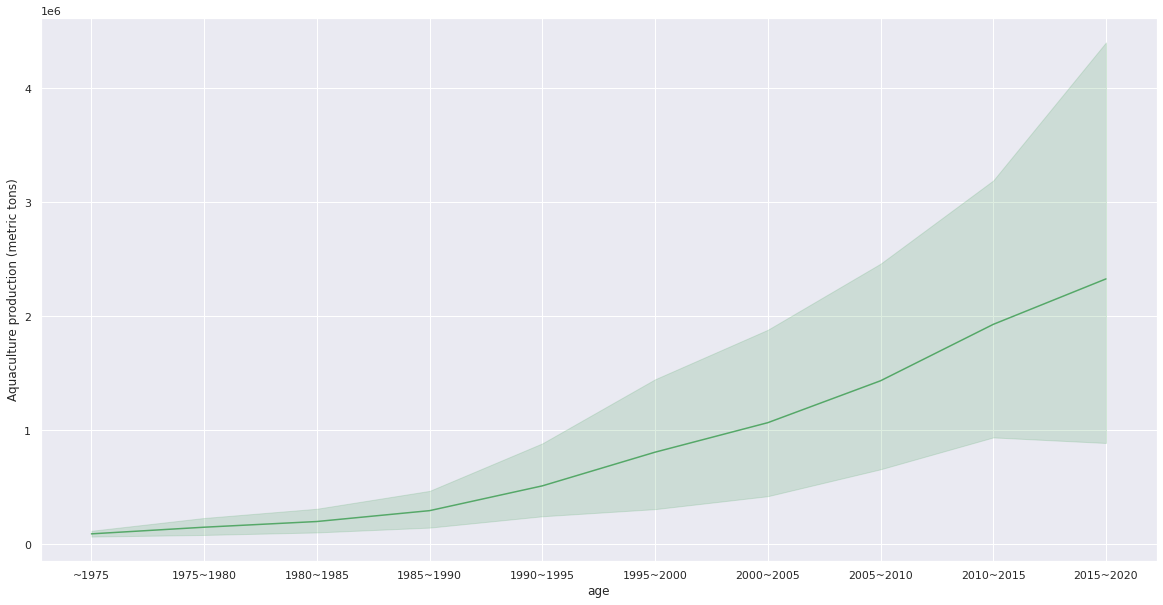

In [31]:
# 아시아 3

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = Asia1,
        y= 'Aquaculture production (metric tons)', color = 'g')
sns.set(rc={'figure.figsize':(20,10)})

In [32]:
df['ground'] = 'S_america' 

In [33]:
### 아메리카 1
S_america = ('Bahamas','Barbados','Belize','Bolivia','Brazil','CaribbeanSmallStates','Chile','Colombia','CostaRica','Cuba','Dominica','Ecuador','ElSalvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Venezuela','Uruguay','TrinidadandTobago','Honduras','Peru','Paraguay','Panama','LatinAmerica&Caribbean(IDA&IBRD)','LatinAmerica&Caribbean(excludinghighincome)','LatinAmerica&Caribbean','Jamaica','Nicaragua')
S_america1 = df[df['Entity'].isin(S_america)]
S_america1

,Entity,Code,Year,Aquaculture production (metric tons),age,ground
646,Bahamas,BHS,1960,0.000000,~1975,S_america
647,Bahamas,BHS,1961,0.000000,~1975,S_america
648,Bahamas,BHS,1962,0.000000,~1975,S_america
649,Bahamas,BHS,1963,0.000000,~1975,S_america
650,Bahamas,BHS,1964,0.000000,~1975,S_america
...,...,...,...,...,...,...
11381,Venezuela,VEN,2014,30725.660156,2010~2015,S_america
11382,Venezuela,VEN,2015,18911.410156,2010~2015,S_america
11383,Venezuela,VEN,2016,25998.000000,2015~2020,S_america
11384,Venezuela,VEN,2017,29000.000000,2015~2020,S_america


In [34]:
# 아메리카 2

conditions = [(S_america1['Year'] <= 1975),
              (S_america1['Year'] > 1975) & (S_america1['Year'] <= 1980),
              (S_america1['Year'] > 1980) & (S_america1['Year'] <= 1985),
              (S_america1['Year'] > 1985) & (S_america1['Year'] <= 1990),
              (S_america1['Year'] > 1990) & (S_america1['Year'] <= 1995),
              (S_america1['Year'] > 1995) & (S_america1['Year'] <= 2000),
              (S_america1['Year'] > 2000) & (S_america1['Year'] <= 2005),
              (S_america1['Year'] > 2005) & (S_america1['Year'] <= 2010),
              (S_america1['Year'] > 2010) & (S_america1['Year'] <= 2015),
              (S_america1['Year'] > 2015) & (S_america1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
S_america1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


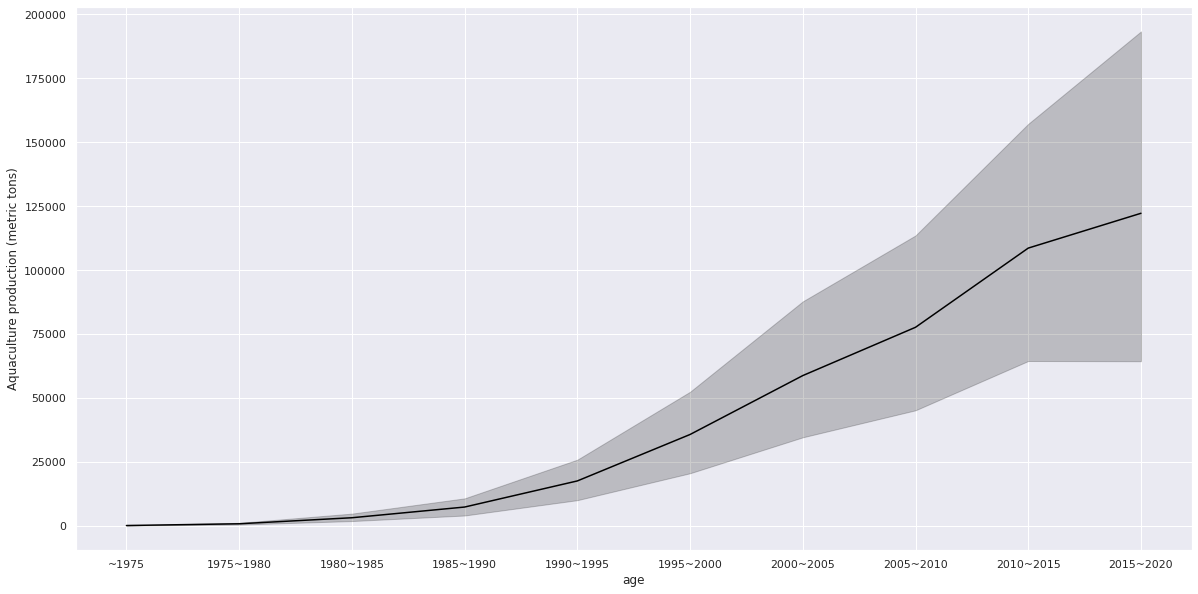

In [35]:
# 아시아 3

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = S_america1,
        y= 'Aquaculture production (metric tons)', color = 'black')
sns.set(rc={'figure.figsize':(20,10)})

In [36]:
df['ground'] = 'N_america'

In [37]:
### 아메리카 1

N_america = ('Canada','UnitedStates','NorthAmerica','Mexico')
N_america1 = df[df['Entity'].isin(N_america)]
N_america1

,Entity,Code,Year,Aquaculture production (metric tons),age,ground
1374,Canada,CAN,1960,2975.000000,~1975,N_america
1375,Canada,CAN,1961,2990.000000,~1975,N_america
1376,Canada,CAN,1962,3100.000000,~1975,N_america
1377,Canada,CAN,1963,3215.000000,~1975,N_america
1378,Canada,CAN,1964,3230.000000,~1975,N_america
...,...,...,...,...,...,...
6636,Mexico,MEX,2014,194229.750000,2010~2015,N_america
6637,Mexico,MEX,2015,211621.640625,2010~2015,N_america
6638,Mexico,MEX,2016,221327.453125,2015~2020,N_america
6639,Mexico,MEX,2017,243307.328125,2015~2020,N_america


In [38]:
# 아메리카 2

conditions = [(N_america1['Year'] <= 1975),
              (N_america1['Year'] > 1975) & (N_america1['Year'] <= 1980),
              (N_america1['Year'] > 1980) & (N_america1['Year'] <= 1985),
              (N_america1['Year'] > 1985) & (N_america1['Year'] <= 1990),
              (N_america1['Year'] > 1990) & (N_america1['Year'] <= 1995),
              (N_america1['Year'] > 1995) & (N_america1['Year'] <= 2000),
              (N_america1['Year'] > 2000) & (N_america1['Year'] <= 2005),
              (N_america1['Year'] > 2005) & (N_america1['Year'] <= 2010),
              (N_america1['Year'] > 2010) & (N_america1['Year'] <= 2015),
              (N_america1['Year'] > 2015) & (N_america1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
N_america1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


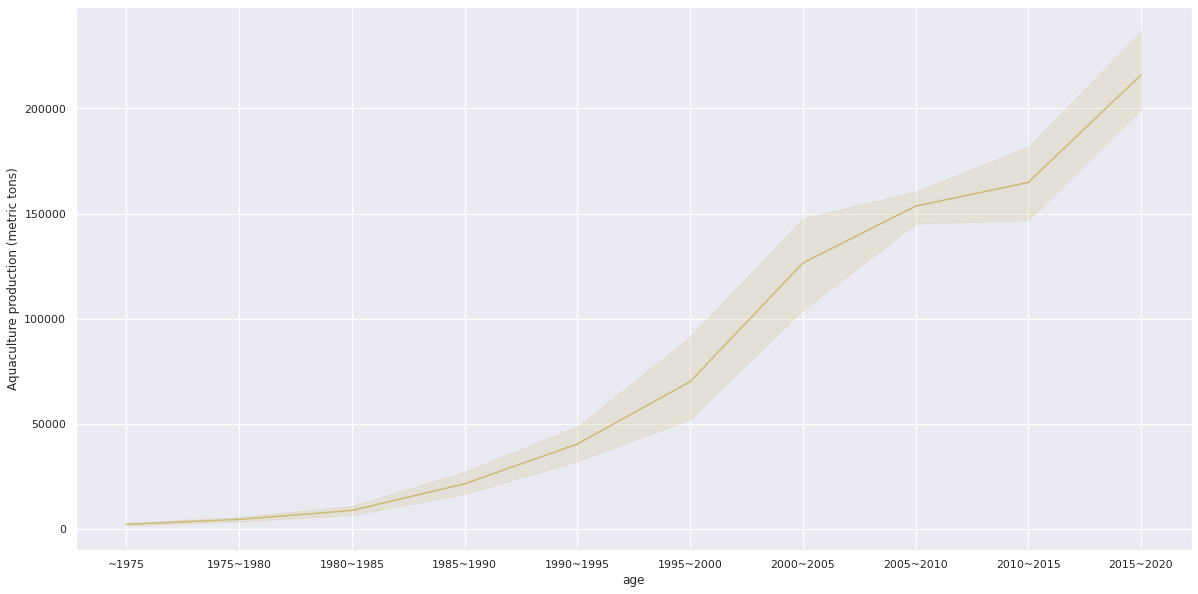

In [39]:
# 아메리카 3

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = N_america1,
        y= 'Aquaculture production (metric tons)', color = 'y')
sns.set(rc={'figure.figsize':(20,10)})

In [40]:
df['ground'] = 'Africa'

In [41]:
Africa=('Benin','Botswana','BurkinaFaso','Burundi','Cameroon','CentralAfricanRepublic','Chad','Cameroon','Congo','CotedIvoire','DemocraticRepublicofCong','Early-demographicdividend','Egypt','EquatorialGuinea','Eswatini','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Mali','Mauritius','Malawi','Madagascar','Lesotho','Liberia','Libya','Myanmar','Namibia','Zimbabwe','Zam','bia','Uganda','Tunisia','Togo','Tanzania','Suriname','Sudan','Sub-SaharanAfrica','Sub-SaharanAfrica(IDA&IBRD)','Sub-SaharanAfrica(excludinghighincome)','SouthSudan','SouthAfrica','SierraLeone','Seychelles','Senegal','SaintVincentandtheGrenadines','Rwanda','Mozambique','Morocco','MiddleEast&NorthAfrica','MiddleEast&NorthAfrica(IDA&IBRD)','MiddleEast&NorthAfrica(excludinghighincome)','Nigeria','Niger')
Africa1 = df[df['Entity'].isin(Africa)]
Africa1
Africa1=Africa1.sort_values(by=['Year'])

In [42]:
# 아프리카 2

conditions = [(Africa1['Year'] <= 1975),
              (Africa1['Year'] > 1975) & (Africa1['Year'] <= 1980),
              (Africa1['Year'] > 1980) & (Africa1['Year'] <= 1985),
              (Africa1['Year'] > 1985) & (Africa1['Year'] <= 1990),
              (Africa1['Year'] > 1990) & (Africa1['Year'] <= 1995),
              (Africa1['Year'] > 1995) & (Africa1['Year'] <= 2000),
              (Africa1['Year'] > 2000) & (Africa1['Year'] <= 2005),
              (Africa1['Year'] > 2005) & (Africa1['Year'] <= 2010),
              (Africa1['Year'] > 2010) & (Africa1['Year'] <= 2015),
              (Africa1['Year'] > 2015) & (Africa1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
Africa1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.

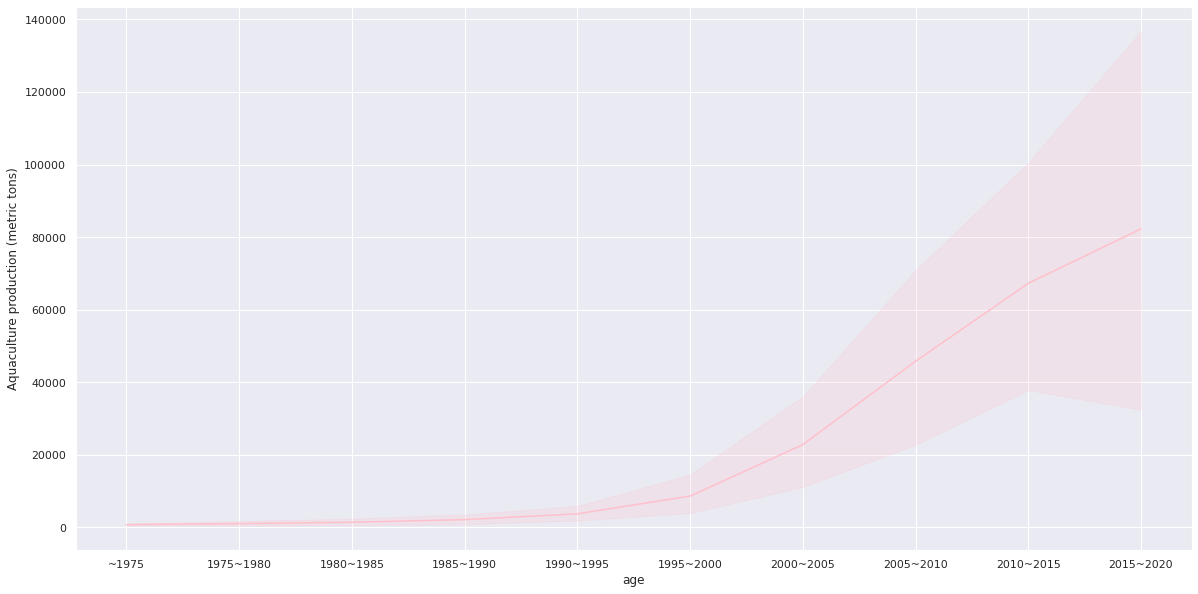

In [43]:
# 아프리카 3

import matplotlib.pyplot as plt
sns.lineplot( x= 'age', data = Africa1,
        y= 'Aquaculture production (metric tons)', color = 'pink')
sns.set(rc={'figure.figsize':(20,10)})

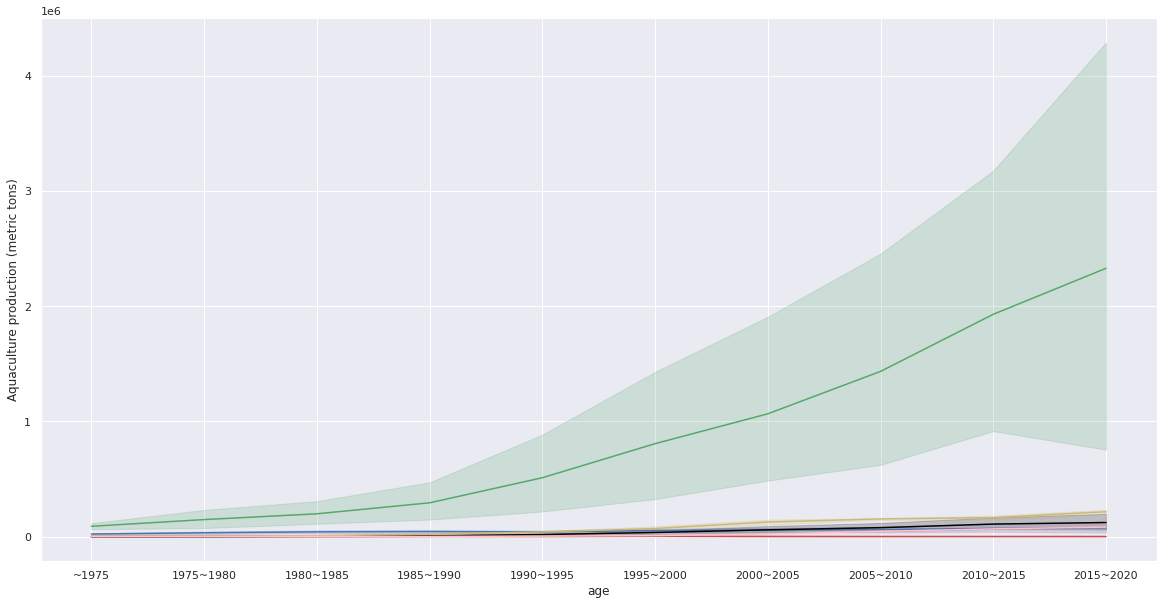

In [44]:
# 대륙별 데이터를 모아 한눈에 확인해봅니다. > 아시아의 데이터가 압도적으로 많은 것을 알 수 있습니다.
import matplotlib.pyplot as plt

sns.lineplot( x= 'age', data = Europe1,
        y= 'Aquaculture production (metric tons)', color = 'b')

sns.lineplot( x= 'age', data = Oceania1,
        y= 'Aquaculture production (metric tons)', color = 'r')

sns.lineplot( x= 'age', data = Asia1,
        y= 'Aquaculture production (metric tons)', color = 'g')

sns.lineplot( x= 'age', data = S_america1,
        y= 'Aquaculture production (metric tons)', color = 'black')

sns.lineplot( x= 'age', data = N_america1,
        y= 'Aquaculture production (metric tons)', color = 'y')

sns.lineplot( x= 'age', data = Africa1,
        y= 'Aquaculture production (metric tons)', color = 'pink')

sns.set(rc={'figure.figsize':(20,10)})

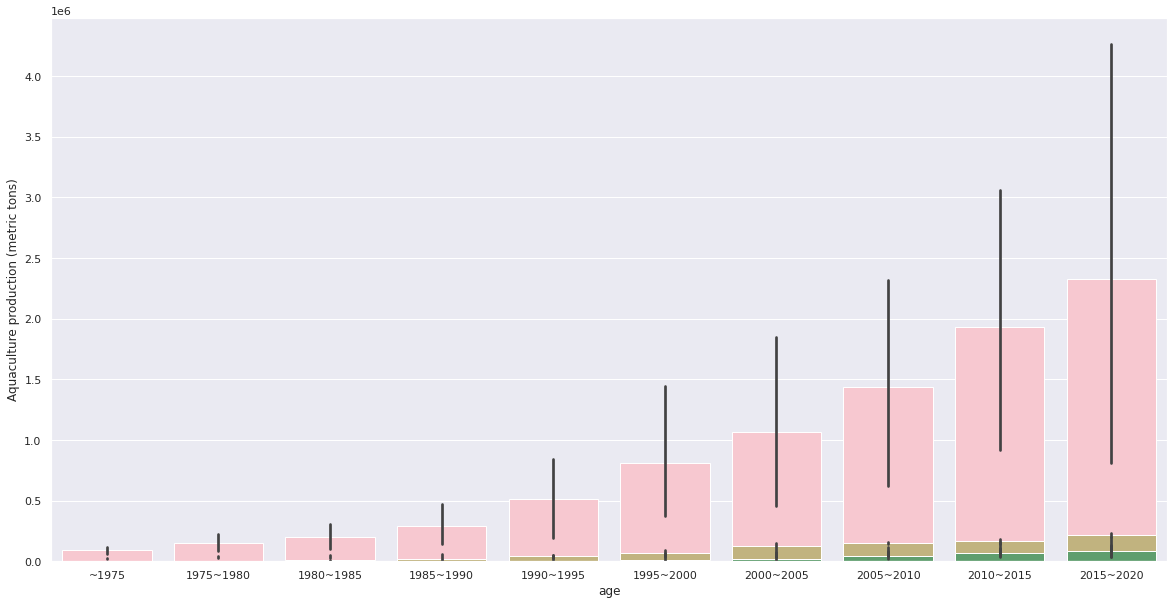

In [45]:
#라인 그래프보다 바 그래프로 봤을 때 좀 더 편안한 시각자료가 되었습니다.
import matplotlib.pyplot as plt

sns.barplot( x= 'age', data = Europe1,
        y= 'Aquaculture production (metric tons)', color = 'b')

sns.barplot( x= 'age', data = Oceania1,
        y= 'Aquaculture production (metric tons)', color = 'r')

sns.barplot( x= 'age', data = Asia1,
        y= 'Aquaculture production (metric tons)', color = 'pink')

sns.barplot( x= 'age', data = S_america1,
        y= 'Aquaculture production (metric tons)', color = 'black')

sns.barplot( x= 'age', data = N_america1,
        y= 'Aquaculture production (metric tons)', color = 'y')

sns.barplot( x= 'age', data = Africa1,
        y= 'Aquaculture production (metric tons)', color = 'g')

sns.set(rc={'figure.figsize':(20,10)})

이후 데이터는 총 양식업과 총 어획량을 연도별로 확인할 수 있습니다.
  
#이에, 우리는 총 생산량을 시각적으로 확인할 수 있는 모델을 살펴보겠습니다.

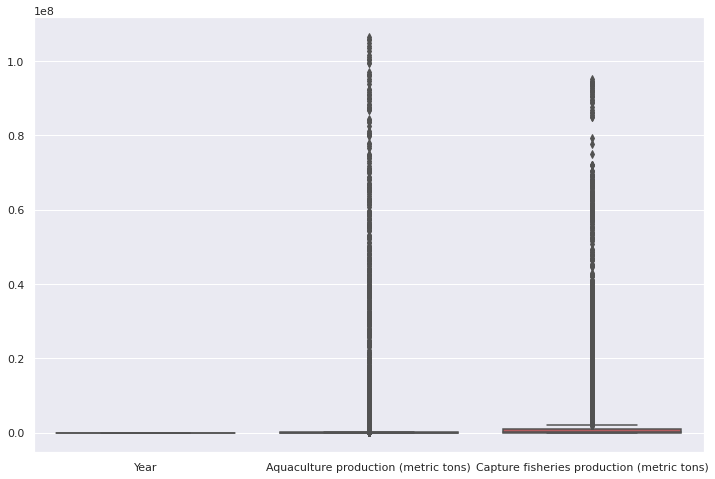

In [46]:
#마찬가지로 이상치는 없는 것으로 보입니다.
plt.figure(figsize=(12,8))
sns.boxplot(data=df1, color='r')
plt.show()

In [47]:
 # capture-fisheries-vs-aquaculture에 결측치가 있습니다.
df1.isnull().sum()

Entity                                           0
Code                                          2773
Year                                             0
Aquaculture production (metric tons)          3017
Capture fisheries production (metric tons)     158
dtype: int64

In [48]:
# 양식데이터는 중요한 데이터인만큼 선형보간법으로 사이의 평균값을 계산하여 결측치 처리하도록 합니다.
def interpolated(df1):
    temp=[]
    for i in df1['Aquaculture production (metric tons)'].unique():
        temp.append(df1[df1['Aquaculture production (metric tons)']==i].interpolate())
    new_df1=pd.concat(temp,axis=0)
    return new_df1


In [49]:
#선형보간법을 통해 결측치가 처리됨을 알 수 있었습니다.
df1_1=interpolated(df1)
df1_1.isnull().sum()

Entity                                           0
Code                                          2773
Year                                             0
Aquaculture production (metric tons)             0
Capture fisheries production (metric tons)       0
dtype: int64

In [50]:
#code 칼럼은 필요가 없어 삭제합니다.
df1_1.isnull().sum()
df1_1.drop(['Code'], axis=1)
df1_1.isnull().sum()

Entity                                           0
Code                                          2773
Year                                             0
Aquaculture production (metric tons)             0
Capture fisheries production (metric tons)       0
dtype: int64

In [51]:
#연도 조절을 위해 날짜를 확인합니다. 조절할 날짜가 없는 것으로 보입니다.
df1['Year'].unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968])

In [52]:
# df1의 연도를 5년별로 지정합니다.
df1['Year'].unique()
conditions = [(df1['Year'] <= 1975),
              (df1['Year'] > 1975) & (df1['Year'] <= 1980),
              (df1['Year'] > 1980) & (df1['Year'] <= 1985),
              (df1['Year'] > 1985) & (df1['Year'] <= 1990),
              (df1['Year'] > 1990) & (df1['Year'] <= 1995),
              (df1['Year'] > 1995) & (df1['Year'] <= 2000),
              (df1['Year'] > 2000) & (df1['Year'] <= 2005),
              (df1['Year'] > 2005) & (df1['Year'] <= 2010),
              (df1['Year'] > 2010) & (df1['Year'] <= 2015),
              (df1['Year'] > 2015) & (df1['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
df1['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.
df1_1=df1.sort_values(by=['Year'])

In [53]:
df1_1['age'].value_counts()

~1975        3771
2010~2015    1319
2005~2010    1304
1995~2000    1290
2000~2005    1290
1990~1995    1280
1985~1990    1233
1975~1980    1200
1980~1985    1200
2015~2020     787
Name: age, dtype: int64

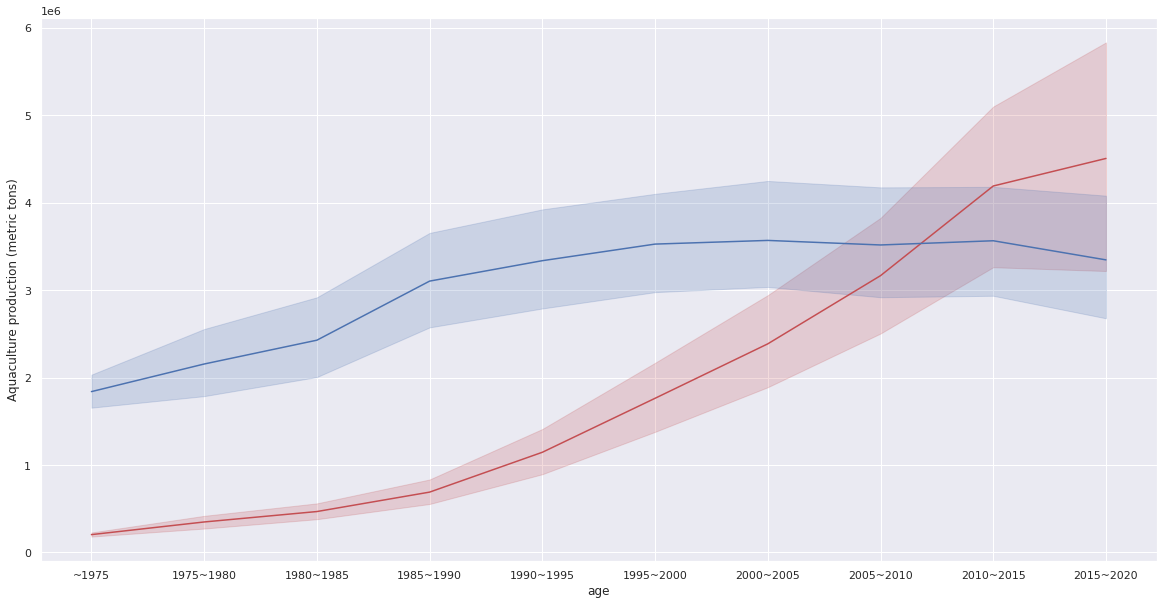

In [54]:
# 5년별 총 양식량과 어획량 시각화 자료
import seaborn as sns

sns.lineplot(x= 'age',
        y= 'Aquaculture production (metric tons)', data= df1_1,color='r') 
sns.lineplot(x= 'age',
        y= 'Capture fisheries production (metric tons)', data= df1_1) 
sns.set(rc={'figure.figsize':(20,10)})

#df1을 사용하여 총 양식량을 예측하는 학습 모델을 만들어보겠습니다.

In [55]:

def interpolated(df1):
    temp=[]
    for i in df1['Aquaculture production (metric tons)'].unique():
        temp.append(df1[df1['Aquaculture production (metric tons)']==i].interpolate())
    new_df1=pd.concat(temp,axis=0)
    return new_df1

In [56]:
#선형보간법을 통해 결측치를 다시 한번 처리합니다. (오류)
df1_1=interpolated(df1)
df1_1.isnull().sum()


Entity                                           0
Code                                          2773
Year                                             0
Aquaculture production (metric tons)             0
Capture fisheries production (metric tons)       0
age                                              0
dtype: int64

In [57]:
#모델 학습을 위해 train과 test 데이터를 나눠주도록 (hold-out) 하겠습니다.
feature = ['Aquaculture production (metric tons)']
target = ['Capture fisheries production (metric tons)']

train = df1_1.sample(frac=0.8,random_state=42)
test = df1_1.drop(train.index)
df1_1_t =test

## train, test 길이 비교
len(train), len(test) #(9326, 2331)

(9326, 2331)

In [58]:
# 기준 모델을 설정합니다. 기준모델은  mean 값을 가집니다.
target ='Capture fisheries production (metric tons)'

X_train = train[feature]
X_test = test[feature]
y_train = train[target]
y_test = test[target]

predict = y_train.mean()
predict

3540265.835742876

In [59]:
# 기준모델로 훈련 에러(MAE) 계산합니다.
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 5142108.91


In [60]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 5109065.64


In [61]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 


In [67]:
#pipe를 통해 모델을 만드니까 과적합 되어있음을 알 수 있습니다.
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor

pipe = make_pipeline( 
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeRegressor(random_state=1)
)
pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.9982438014047645
테스트 정확도:  0.5001196454902375


In [68]:
from sklearn.model_selection import GridSearchCV # import 
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state =2)
params=  {'max_depth': [None,2,3,4,6,8,10,20],
         'min_samples_leaf' : [None,2,3,4,6,8,10,20]}
grid_reg = GridSearchCV(reg,params, scoring ='neg_mean_squared_error',
cv=5,n_jobs=-1)
grid_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 241, in fit
    if not 0.0 < self.min_samples_leaf <= 0.5:
TypeError: '<' not supported between instances of 'float

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20],
                         'min_samples_leaf': [None, 2, 3, 4, 6, 8, 10, 20]},
             scoring='neg_mean_squared_error')

In [69]:
print('최적 하이퍼파라미터: ', grid_reg.best_params_)
print('MAE: ', -grid_reg.best_score_)

최적 하이퍼파라미터:  {'max_depth': 4, 'min_samples_leaf': 4}
MAE:  26847266662714.215


In [72]:
# GridSearchCV 를 통하여 최적의 파라미터를 찾아서 모델을 다시 교육시켰습니다.
model = DecisionTreeRegressor

pipe = make_pipeline( 
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeRegressor(max_depth = 4, min_samples_leaf=4, random_state=1)
)
pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

훈련 정확도:  0.757738991563915
테스트 정확도:  0.7377691140025148
1984770.4565824461


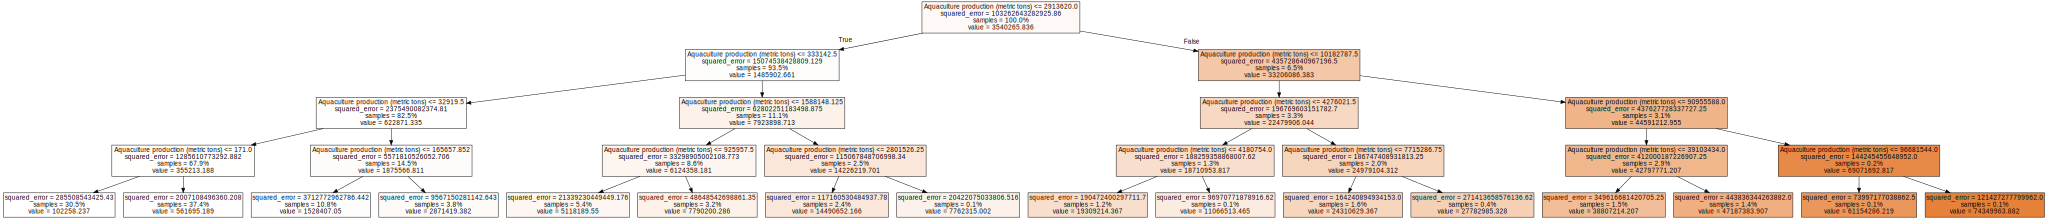

In [73]:
#트리 모델을 그려봅니다.
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeregressor']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_test).columns

dot_data = export_graphviz(model_dt
                          , max_depth=4
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


R2 0.7326354863743783


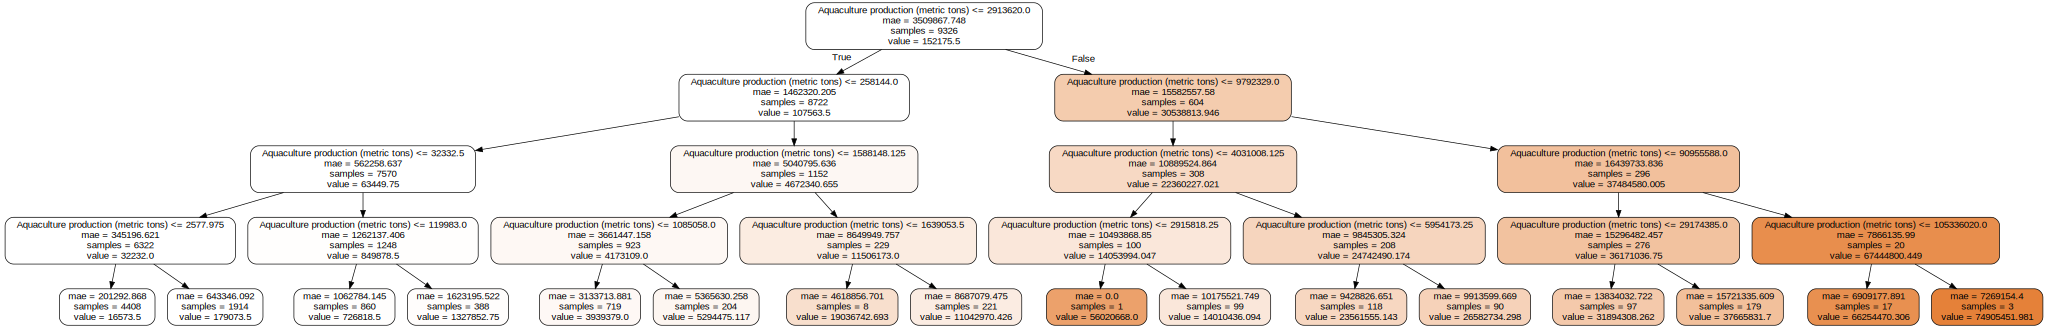

In [74]:
#R2 score를 확인해봅니다.
import graphviz
## jupyterlab 사용시: jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 트리구조 그리는 함수
def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="mae",max_depth=4, random_state=2)
tree.fit(X_train, y_train)
print('R2', tree.score(X_train, y_train))
show_tree(tree, colnames=X_train.columns)

In [75]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 182 kB/s 
     |████████████████████████████████| 13.1 MB 48.6 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=2afe408e6cde539c41ac7e431f5d695c2162ae1280372fc5bfb441a5625a40c0
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


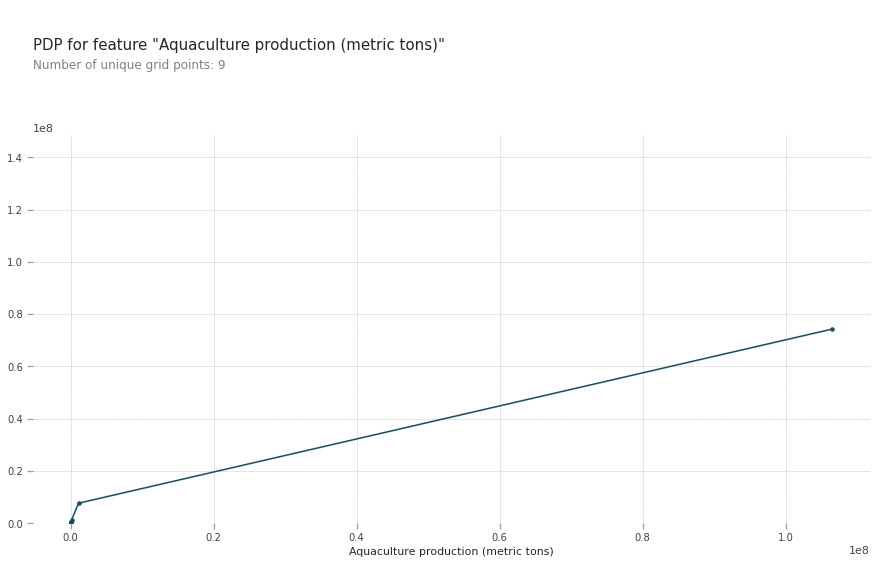

In [76]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Aquaculture production (metric tons)'

isolated = pdp_isolate(
    model=pipe, 
    dataset= X_train, 
    model_features= X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [77]:
row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,Aquaculture production (metric tons)
4,60.0


In [78]:
# 모델이 이렇게 예측한 이유를 알기 위하여
# SHAP Force Plot을 그려보겠습니다.
!pip install shap
import shap

explainer = shap.TreeExplainer(pipe['decisiontreeregressor'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features= row
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [79]:
# 100개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의하세요.
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])

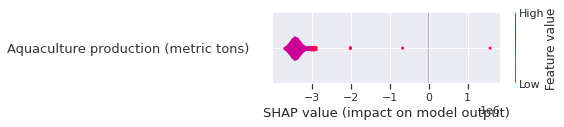

In [80]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="violin")

#1인당 생선 및 해산물 소비량에 대한 모델 만들기

In [81]:
#1인당 생선 및 해산물 소비량.csv
#연도별 유니크 값을 찾았을 떄, 69년보다 이전의 연도가 있어서 삭제처리를 진행합니다.
#코드는 필요없는 칼람으로 삭제처리 합니다.
df3=df3[df3['Year'] >= 1969]
df3['Year'].unique()
df3.drop(['Code'], axis=1)

,Entity,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
8,Afghanistan,1969,0.04
9,Afghanistan,1970,0.04
10,Afghanistan,1971,0.05
11,Afghanistan,1972,0.05
12,Afghanistan,1973,0.05
...,...,...,...
11023,Zimbabwe,2013,2.82
11024,Zimbabwe,2014,3.39
11025,Zimbabwe,2015,3.82
11026,Zimbabwe,2016,3.79


In [82]:
#앞서 봤던 총 양식량과 어획량 데이터와 소비량의 데이터를 합쳐줍니다.
#데이터를 합침으로써 총 어획량 대비 소비량을 확인하겠습니다.
whole=pd.merge(df1_1,df3)
whole 


#데이터 손실 방지 위해 카피를 진행합니다.
whole1 = whole.copy()

whole1['Aquaculture production (metric tons)']=whole1['Aquaculture production (metric tons)']*1000
whole1['Capture fisheries production (metric tons)']=whole1['Capture fisheries production (metric tons)']*1000
whole1

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1969,60000.0,400000.0,~1975,0.04
1,Afghanistan,AFG,1970,60000.0,400000.0,~1975,0.04
2,Afghanistan,AFG,1971,60000.0,500000.0,~1975,0.05
3,Afghanistan,AFG,1972,60000.0,500000.0,~1975,0.05
4,Afghanistan,AFG,1973,60000.0,500000.0,~1975,0.05
...,...,...,...,...,...,...,...
6719,Zimbabwe,ZWE,2011,7682000.0,102435000.0,2010~2015,2.99
6720,Zimbabwe,ZWE,2012,8090000.0,101071000.0,2010~2015,2.91
6721,Zimbabwe,ZWE,2013,10090000.0,128899000.0,2010~2015,2.82
6722,Zimbabwe,ZWE,2016,10085000.0,129202000.0,2015~2020,3.79


In [83]:
#처음과 마찬가지로 대륙별로 나누어 줍니다.

### 유럽 1 

Europe = ('Belarus','Belgium','BosniaandHerzegovina','Bulgaria','CentralEuropeandtheBaltics','ChannelIslands','Croatia','Czechia','Denmark','Estonia','Euroarea','Europe&CentralAsia','urope&CentralAsia(IDA&IBRD)','Europe&CentralAsia(excludinghighincome)','FaeroeIslands','Finland','France','FrenchPolynesia','Germany','Greece','Hungary','Iceland','Malta','Lithuania','Netherlands','UnitedKingdom','TurksandCaicosIslands','Sweden','Switzerland','Tajikistan','Spain','SolomonIslands','Slovenia','Slovakia','Singapore','Serbia','Romania','Portugal','Poland','Montenegro','Moldova','Ireland','Italy','Latvia','Norway','NorthMacedonia')
Europe1 = whole1[whole1['Entity'].isin(Europe)]
Europe1
Europe1=Europe1.sort_values(by=['Year'])

# 오세아니아 1

Oceania =  ('Fiji','Vanuatu','Kiribati','MarshallIslands','Tonga','SolomonIslands','Samoa','Pacificislandsmallstates','NorthernMarianaIslands','NewZealand','NewCaledonia???“Fragileandconflictaffectedsituations','Heavilyindebtedpoorcountries(HIPC)','Highincome’','IBRDonly','IDA&IBRDtotal’','IDAblend','IDAonly','IDAtotal')
Oceania1 = whole1[whole1['Entity'].isin(Oceania)]
Oceania1


Asia = ['Bahrain','Azerbaijan','Bangladesh','Bhutan','BritishVirginIslands','Brunei','Cambodia','China','Cyprus','DominicanRepublic','EastAsia&Pacific','EastAsia&Pacific(IDA&IBRD)','EastAsia&Pacific(excludinghighincome)','Eritrea','Georgia','Guam','HongKong','India','Indonesia','Iran','Kuwait','Kyrgyzstan','Laos','Lebanon','Micronesia(country)','Nauru','Nepal','Malaysia','NorthKorea','Oman','Kazakhstan','Israel','Jordan','Japan','Yemen','Vietnam','Uzbekistan','UnitedStatesVirginIsland','UnitedArabEmirates','Ukraine','Tuvalu','Turkey','Turkmenistan','Thailand','Timor','Syria','SouthKorea','SriLanka','SouthAsia','SouthAsia(IDA&IBRD)','SaudiArabia','SaintLucia','Russia','Qatar','PuertoRico','SaintLucia','Philippines','PapuaNewGuinea','Palestine','Palau','Pakistan','Iraq']
Asia1 = whole1[whole1['Entity'].isin(Asia)]
Asia1
Asia1=Asia1.sort_values(by=['Year'])


### 아메리카 1
S_america = ('Bahamas','Barbados','Belize','Bolivia','Brazil','CaribbeanSmallStates','Chile','Colombia','CostaRica','Cuba','Dominica','Ecuador','ElSalvador','Grenada','Guatemala','Guyana','Haiti','Honduras','Venezuela','Uruguay','TrinidadandTobago','Honduras','Peru','Paraguay','Panama','LatinAmerica&Caribbean(IDA&IBRD)','LatinAmerica&Caribbean(excludinghighincome)','LatinAmerica&Caribbean','Jamaica','Nicaragua')
S_america1 = whole1[whole1['Entity'].isin(S_america)]
S_america1


### 아메리카 1

N_america = ('Canada','UnitedStates','NorthAmerica','Mexico')
N_america1 = whole1[whole1['Entity'].isin(N_america)]
N_america1


Africa=('Benin','Botswana','BurkinaFaso','Burundi','Cameroon','CentralAfricanRepublic','Chad','Cameroon','Congo','CotedIvoire','DemocraticRepublicofCong','Early-demographicdividend','Egypt','EquatorialGuinea','Eswatini','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Mali','Mauritius','Malawi','Madagascar','Lesotho','Liberia','Libya','Myanmar','Namibia','Zimbabwe','Zam','bia','Uganda','Tunisia','Togo','Tanzania','Suriname','Sudan','Sub-SaharanAfrica','Sub-SaharanAfrica(IDA&IBRD)','Sub-SaharanAfrica(excludinghighincome)','SouthSudan','SouthAfrica','SierraLeone','Seychelles','Senegal','SaintVincentandtheGrenadines','Rwanda','Mozambique','Morocco','MiddleEast&NorthAfrica','MiddleEast&NorthAfrica(IDA&IBRD)','MiddleEast&NorthAfrica(excludinghighincome)','Nigeria','Niger')
Africa1 = whole1[whole1['Entity'].isin(Africa)]
Africa1
Africa1=Africa1.sort_values(by=['Year'])

In [84]:
Africa1

,Entity,Code,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
331,Guinea-Bissau,GNB,1969,0.000000e+00,1400000.0,~1975,2.53
668,Suriname,SUR,1969,0.000000e+00,9900000.0,~1975,30.25
3893,Myanmar,MMR,1969,6.200000e+05,413900000.0,~1975,13.62
5358,Nigeria,NGA,1969,3.613000e+06,112237000.0,~1975,3.15
134,Kenya,KEN,1969,2.930000e+05,32000000.0,~1975,2.93
...,...,...,...,...,...,...,...
6312,Togo,TGO,2017,1.320000e+05,26915000.0,2015~2020,11.73
3992,Guinea,GIN,2017,5.729000e+05,333197000.0,2015~2020,10.09
1270,Ethiopia,ETH,2017,1.260000e+05,56005000.0,2015~2020,0.44
4833,Lesotho,LSO,2017,1.801000e+06,52000.0,2015~2020,1.84


In [85]:
whole1.isnull().sum()
whole1.drop(['Code'], axis=1, inplace= True)

In [86]:
#범주형 데이터를 숫자형 데이터로 변환하기 위하여 오디너리 인코딩을 사용합니다.
import category_encoders
from sklearn.preprocessing import OrdinalEncoder
encoder = category_encoders.OrdinalEncoder()
encoder = encoder.fit(whole1)
encoded = encoder.transform(whole1)
encoder.inverse_transform(encoded)
whole2=encoded

In [87]:
#데이터 모델을 만들기위해 트레인/test로 나누어줍니다 (hold-out)
train = whole2.sample(frac=0.75,random_state=2)
test = whole2.drop(train.index)
whole2_t =test

In [88]:
## train, test 길이 비교
len(train), len(test) # (5870, 1467)

(5043, 1681)

In [89]:
whole2


,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,1,1969,60000.0,400000.0,1,0.04
1,1,1970,60000.0,400000.0,1,0.04
2,1,1971,60000.0,500000.0,1,0.05
3,1,1972,60000.0,500000.0,1,0.05
4,1,1973,60000.0,500000.0,1,0.05
...,...,...,...,...,...,...
6719,22,2011,7682000.0,102435000.0,2,2.99
6720,22,2012,8090000.0,101071000.0,2,2.91
6721,22,2013,10090000.0,128899000.0,2,2.82
6722,22,2016,10085000.0,129202000.0,9,3.79


In [90]:
#기준모델을 만들어줍니다.
# 다중모델 학습을 위한 특성
#features = whole2.drop(target, axis=1)
features = ['Entity',	'Year',	'Aquaculture production (metric tons)',	'Capture fisheries production (metric tons)',	'age']
X_train = train[features]
X_test = test[features]

target = 'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)'
y_train = train[target]
y_test = test[target]

predict = y_train.mean()
predict

16.675294467578823

In [91]:
X_train

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age
5450,156,2011,509800000.0,2.190000e+08,2
3896,124,1975,1520000.0,9.493600e+07,1
3560,144,1987,953813000.0,7.016276e+09,5
3951,91,2014,215000.0,6.518800e+07,2
5460,123,1995,829000.0,2.080000e+05,4
...,...,...,...,...,...
5801,64,1970,18850000.0,4.395900e+07,1
6058,162,1976,412663000.0,1.993033e+09,8
6512,164,2006,519967000.0,5.311208e+09,6
3966,122,1994,4393000.0,7.211000e+06,4


In [92]:
whole2.drop(target, axis=1)

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age
0,1,1969,60000.0,400000.0,1
1,1,1970,60000.0,400000.0,1
2,1,1971,60000.0,500000.0,1
3,1,1972,60000.0,500000.0,1
4,1,1973,60000.0,500000.0,1
...,...,...,...,...,...
6719,22,2011,7682000.0,102435000.0,2
6720,22,2012,8090000.0,101071000.0,2
6721,22,2013,10090000.0,128899000.0,2
6722,22,2016,10085000.0,129202000.0,9


In [93]:
#확실한 과적합이 일어났네요 ^^;
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeRegressor(random_state=1)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

훈련 정확도:  1.0
검증 정확도:  0.9373514209101941
1.722433075550268


In [94]:
#그리드 서치를 통해 최적 하이퍼 파라미터를 찾습니다.
from sklearn.model_selection import GridSearchCV # import 
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state =2)
params=  {'max_depth': [None,2,3,4,6,8,10,20],
         'min_samples_leaf' : [None,2,3,4,6,8,10,20]}
grid_reg = GridSearchCV(reg,params, scoring ='neg_mean_squared_error',
cv=5,n_jobs=-1)
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20],
                         'min_samples_leaf': [None, 2, 3, 4, 6, 8, 10, 20]},
             scoring='neg_mean_squared_error')

In [95]:
print('최적 하이퍼파라미터: ', grid_reg.best_params_)
print('MAE: ', -grid_reg.best_score_)

최적 하이퍼파라미터:  {'max_depth': None, 'min_samples_leaf': 3}
MAE:  23.18951463834513


In [96]:
#음...과적합이 해결이 안되었습니다.
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeRegressor(min_samples_leaf=3, random_state=1)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

훈련 정확도:  0.9860201137387689
검증 정확도:  0.9388141917456045
1.8673918302597659


In [97]:
#자체적으로 값을 조정해도 이정도네요 ^^;;
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeRegressor(max_depth=30,min_samples_leaf=10, random_state=1)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

훈련 정확도:  0.9296798957809149
검증 정확도:  0.8778117974879885
2.821866604651089


R2 0.2030440307130038


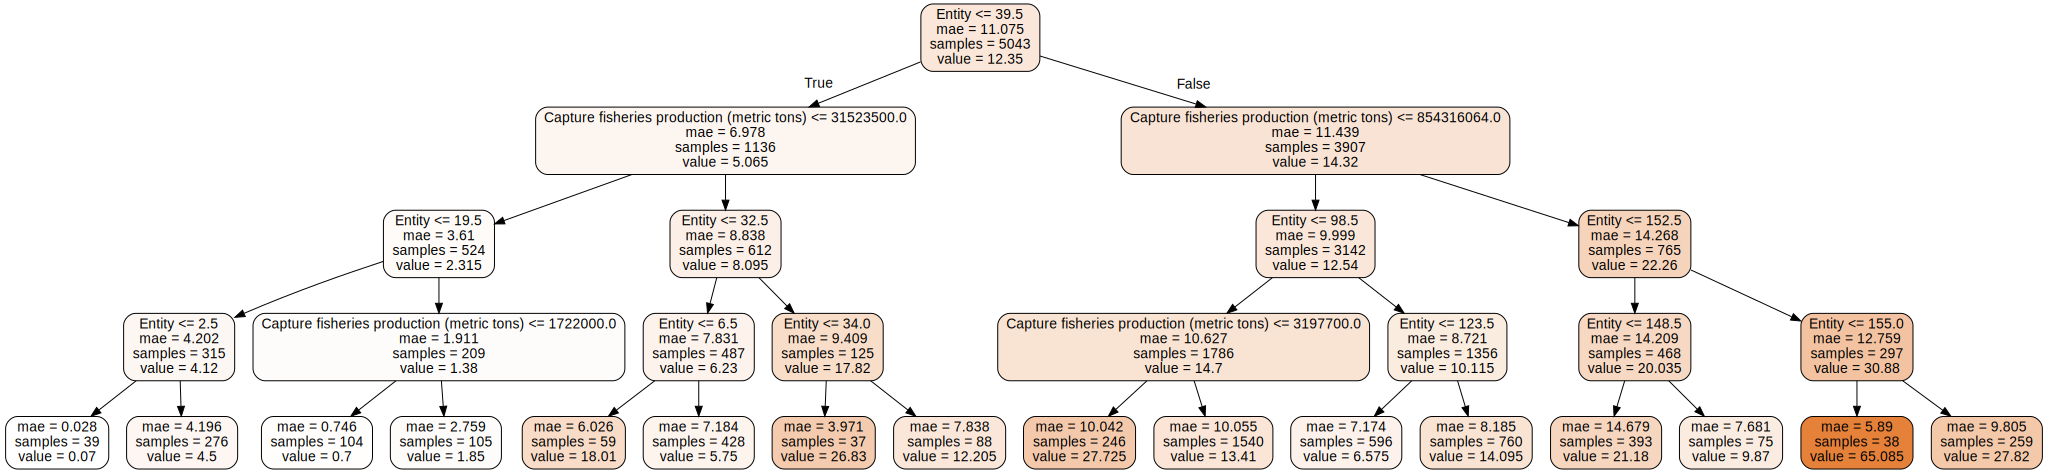

In [98]:
import graphviz
## jupyterlab 사용시: jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 트리구조 그리는 함수
def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="mae",max_depth=4, random_state=2)
tree.fit(X_train, y_train)
print('R2', tree.score(X_train, y_train))
show_tree(tree, colnames=X_train.columns)

In [99]:
whole2

,Entity,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,1,1969,60000.0,400000.0,1,0.04
1,1,1970,60000.0,400000.0,1,0.04
2,1,1971,60000.0,500000.0,1,0.05
3,1,1972,60000.0,500000.0,1,0.05
4,1,1973,60000.0,500000.0,1,0.05
...,...,...,...,...,...,...
6719,22,2011,7682000.0,102435000.0,2,2.99
6720,22,2012,8090000.0,101071000.0,2,2.91
6721,22,2013,10090000.0,128899000.0,2,2.82
6722,22,2016,10085000.0,129202000.0,9,3.79


In [100]:
from sklearn.metrics import r2_score

1 features
Selected names:  Index(['Entity'], dtype='object')
Test MAE: $4
Test R2: 0.8738455786161619 

2 features
Selected names:  Index(['Entity', 'Year'], dtype='object')
Test MAE: $2
Test R2: 0.923236066332086 

3 features
Selected names:  Index(['Entity', 'Year', 'Capture fisheries production (metric tons)'], dtype='object')
Test MAE: $3
Test R2: 0.8896871901330086 

4 features
Selected names:  Index(['Entity', 'Year', 'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)'],
      dtype='object')
Test MAE: $3
Test R2: 0.8781486644880151 

5 features
Selected names:  Index(['Entity', 'Year', 'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)', 'age'],
      dtype='object')
Test MAE: $3
Test R2: 0.8778117974879885 



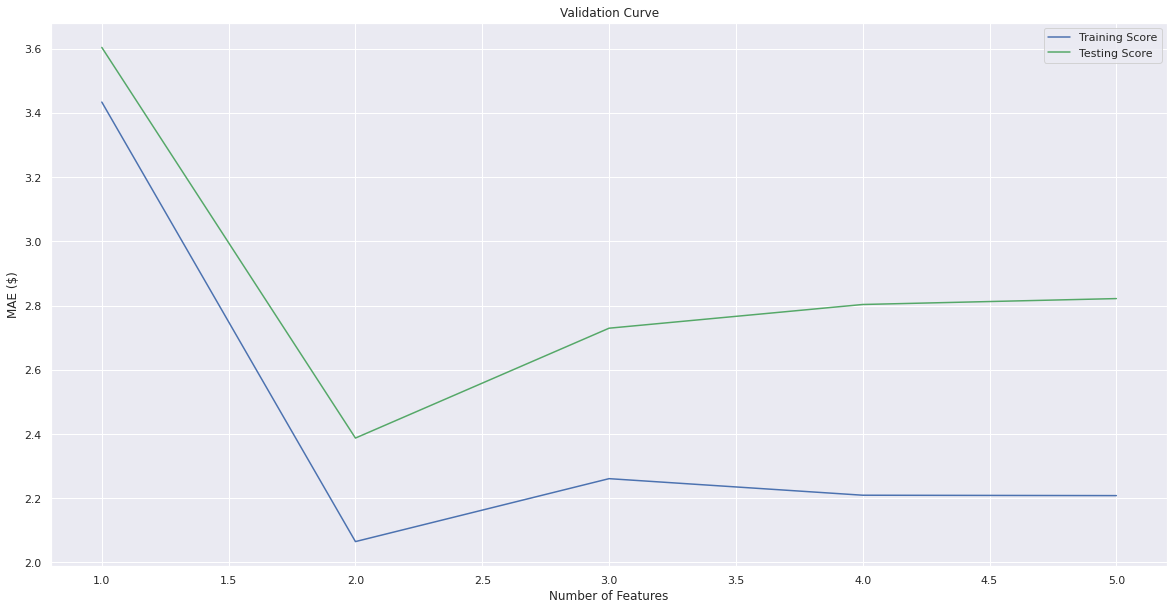

In [101]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다. > 그래프를 확인하니 2개가 적당한 것으로 보입니다.

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

## f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest


training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = pipe
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()


#다음 데이터를 통해서 전체 어획량과 남획 데이터를 비교해보겠습니다.

In [102]:
##이 파일은 지역 및 세계에서 지속 가능하고 남획된 어류 저장량을 보여줍니다.
df4

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
4,Eastern Indian Ocean,NaN,2015,73.076920,26.923080
5,Eastern Indian Ocean,NaN,2017,68.627451,31.372549
6,Mediterranean and Black Sea,NaN,2015,37.837840,62.162160
7,Mediterranean and Black Sea,NaN,2017,37.500000,62.500000
8,Northeast Central Atlantic,NaN,2015,73.469390,26.530610
9,Northeast Central Atlantic,NaN,2017,79.310345,20.689655


In [103]:
#마찬가지로 연도를 확인합니다.
df4['Year'].unique()
#df4['Code'].value_counts()
df4

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
4,Eastern Indian Ocean,NaN,2015,73.076920,26.923080
5,Eastern Indian Ocean,NaN,2017,68.627451,31.372549
6,Mediterranean and Black Sea,NaN,2015,37.837840,62.162160
7,Mediterranean and Black Sea,NaN,2017,37.500000,62.500000
8,Northeast Central Atlantic,NaN,2015,73.469390,26.530610
9,Northeast Central Atlantic,NaN,2017,79.310345,20.689655


In [104]:
df1['Entity'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Caribbean Small States', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
    

In [105]:
df4['Entity'].unique()

array(['Eastern Central Atlantic', 'Eastern Central Pacific',
       'Eastern Indian Ocean', 'Mediterranean and Black Sea',
       'Northeast Central Atlantic', 'Northeast Pacific',
       'Northwest Central Atlantic', 'Northwest Pacific',
       'Southeast Central Atlantic', 'Southeast Pacific',
       'Southwest Atlantic', 'Southwest Pacific',
       'Western Central Atlantic', 'Western Central Pacific',
       'Western Indian Ocean', 'World'], dtype=object)

In [106]:
#데이터를 우선적으로 꼼꼼하게 확인할 필요가 있었는데, 사용할 수 있는 데이터가 이렇게 적어질 줄 몰랐습니다.
#데이터를 합치기위해서 통일된 데이터가 'world' 1개라서 이를 기준으로 합쳐주기로 합니다.
len(df1[df1['Entity']=='World'])

56

In [107]:
#합쳐주기 위한 인코딩을 진행합니다.
from sklearn.preprocessing import OrdinalEncoder
encoder = category_encoders.OrdinalEncoder()
encoder = encoder.fit(df4)
encoded = encoder.transform(df4)
encoder.inverse_transform(encoded)
df4_1=encoded
df4_1

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,1,1,2015,57.142860,42.857140
1,1,1,2017,57.142857,42.857143
2,2,1,2015,86.666670,13.333330
3,2,1,2017,86.666667,13.333333
4,3,1,2015,73.076920,26.923080
5,3,1,2017,68.627451,31.372549
6,4,1,2015,37.837840,62.162160
7,4,1,2017,37.500000,62.500000
8,5,1,2015,73.469390,26.530610
9,5,1,2017,79.310345,20.689655


In [108]:
#데이터를 합칩니다.
group=df1.merge(df4, on=['Entity','Year'], how='inner')

In [109]:
len(group)

20

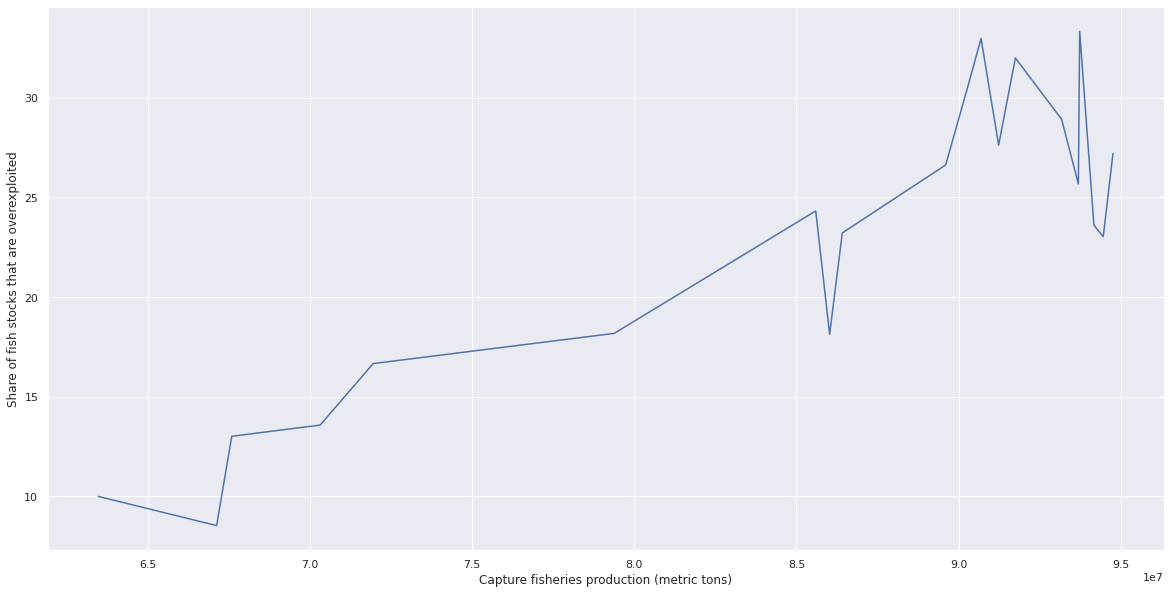

In [110]:
#당연하게 생산량이 증가하면 남획량도 증가합니다! ( 단, 적은 데이터이기 때문에 신뢰성이 떨어집니다.)
import seaborn as sns


sns.lineplot(x= 'Capture fisheries production (metric tons)',
        y= 'Share of fish stocks that are overexploited', data= group, color = 'b')
 
sns.set(rc={'figure.figsize':(20,10)})

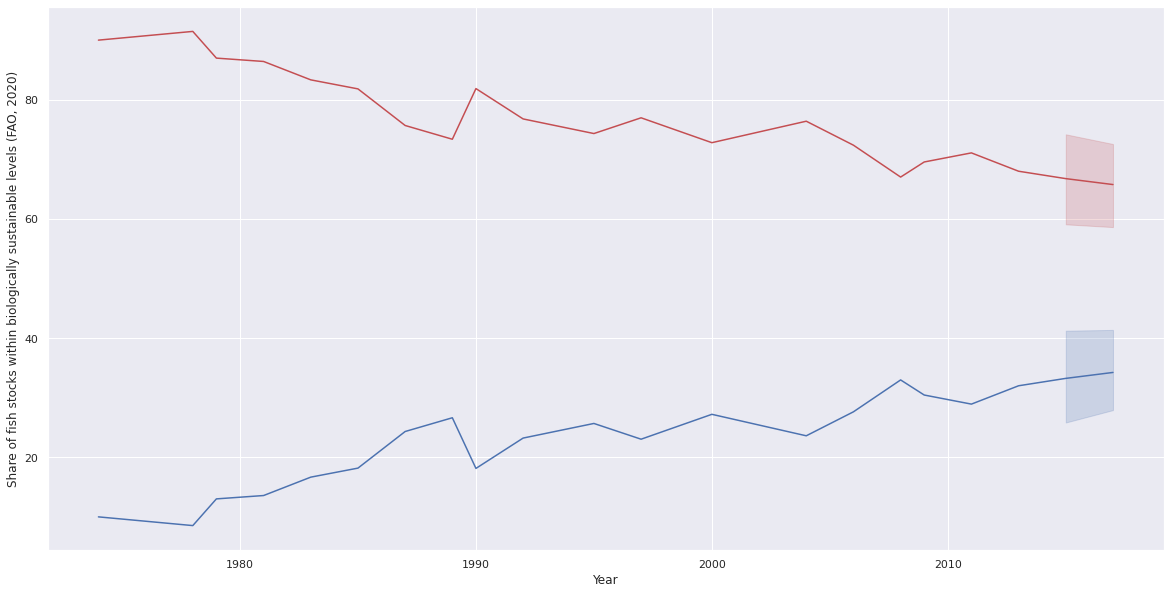

In [111]:
#시간이 지날수록 우리가 잡을 수 있는 물고기종은 적어지고, 남획의 양은 점점 증가하고 있음을 알 수 있습니다.
import seaborn as sns


sns.lineplot(x= 'Year',
        y= 'Share of fish stocks within biologically sustainable levels (FAO, 2020)', data= df4, color = 'r')
sns.lineplot(x= 'Year',
        y= 'Share of fish stocks that are overexploited', data= df4, color = 'b')
 
sns.set(rc={'figure.figsize':(20,10)})

In [112]:
# df4 또한 5년별로 지정합니다.
df4['Year'].unique()
conditions = [(df4['Year'] <= 1975),
              (df4['Year'] > 1975) & (df4['Year'] <= 1980),
              (df4['Year'] > 1980) & (df4['Year'] <= 1985),
              (df4['Year'] > 1985) & (df4['Year'] <= 1990),
              (df4['Year'] > 1990) & (df4['Year'] <= 1995),
              (df4['Year'] > 1995) & (df4['Year'] <= 2000),
              (df4['Year'] > 2000) & (df4['Year'] <= 2005),
              (df4['Year'] > 2005) & (df4['Year'] <= 2010),
              (df4['Year'] > 2010) & (df4['Year'] <= 2015),
              (df4['Year'] > 2015) & (df4['Year'] <= 2020)]

labels = ['~1975','1975~1980','1980~1985','1985~1990','1990~1995','1995~2000','2000~2005','2005~2010','2010~2015','2015~2020']
df4['age'] = np.select(conditions,labels) # select = 하나의 컬럼에 로우를 넣어준다. 
                                         # 두개를 골라 맞춰준다! 셀렉트 해준다.
#df4_1=df1.sort_values(by=['Year'])

In [113]:
#결측치가 있는지 확인했는데, 결측치가 없습니다.
group.isnull().sum()

Entity                                                                     0
Code_x                                                                     0
Year                                                                       0
Aquaculture production (metric tons)                                       0
Capture fisheries production (metric tons)                                 0
age                                                                        0
Code_y                                                                     0
Share of fish stocks within biologically sustainable levels (FAO, 2020)    0
Share of fish stocks that are overexploited                                0
dtype: int64

In [114]:
import category_encoders
from sklearn.preprocessing import OrdinalEncoder
encoder = category_encoders.OrdinalEncoder()
encoder = encoder.fit(group)
encoded = encoder.transform(group)
encoder.inverse_transform(encoded)
group=encoded

In [115]:
#인코딩이 적용되었습니다.
group

,Entity,Code_x,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,Code_y,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,1,1,1974,4.941524e+06,6.347042e+07,1,1,90.000000,10.000000
1,1,1,1978,6.593363e+06,6.711575e+07,2,1,91.463415,8.536585
2,1,1,1979,6.714748e+06,6.758358e+07,2,1,86.982249,13.017751
3,1,1,1981,7.818586e+06,7.030878e+07,3,1,86.419753,13.580247
4,1,1,1983,9.089265e+06,7.194627e+07,3,1,83.333333,16.666667
5,1,1,1985,1.135435e+07,7.938011e+07,3,1,81.818182,18.181818
6,1,1,1987,1.397150e+07,8.559538e+07,4,1,75.675676,24.324324
7,1,1,1989,1.648635e+07,8.960318e+07,4,1,73.369565,26.630435
8,1,1,1990,1.685046e+07,8.602430e+07,4,1,81.868132,18.131868
9,1,1,1992,2.121149e+07,8.641559e+07,5,1,76.777251,23.222749


In [157]:
#학습을 위해 트레인 셋과 테스트 셋을 나눠줍니다.
train = group.sample(frac=0.75,random_state=2)
test = group.drop(train.index)
group_t =test

In [117]:
len(train), len(test)

(15, 5)

In [158]:
# 기준모델을 만듭니다.
#features = whole2.drop(target, axis=1)
target = ['Share of fish stocks that are overexploited']
features = ['Entity',	'Code_x',	'Year','Aquaculture production (metric tons)',	'Capture fisheries production (metric tons)','age',	'Code_y',	'Share of fish stocks within biologically sustainable levels (FAO, 2020)']
X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]

predict = y_train.mean()
predict

Share of fish stocks that are overexploited    21.650104
dtype: float64

In [119]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 6.66


In [120]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 6.23


In [121]:
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeRegressor(min_samples_leaf=2,random_state=42)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

훈련 정확도:  0.9907905929010207
검증 정확도:  0.7598097697459023
2.413918575666667


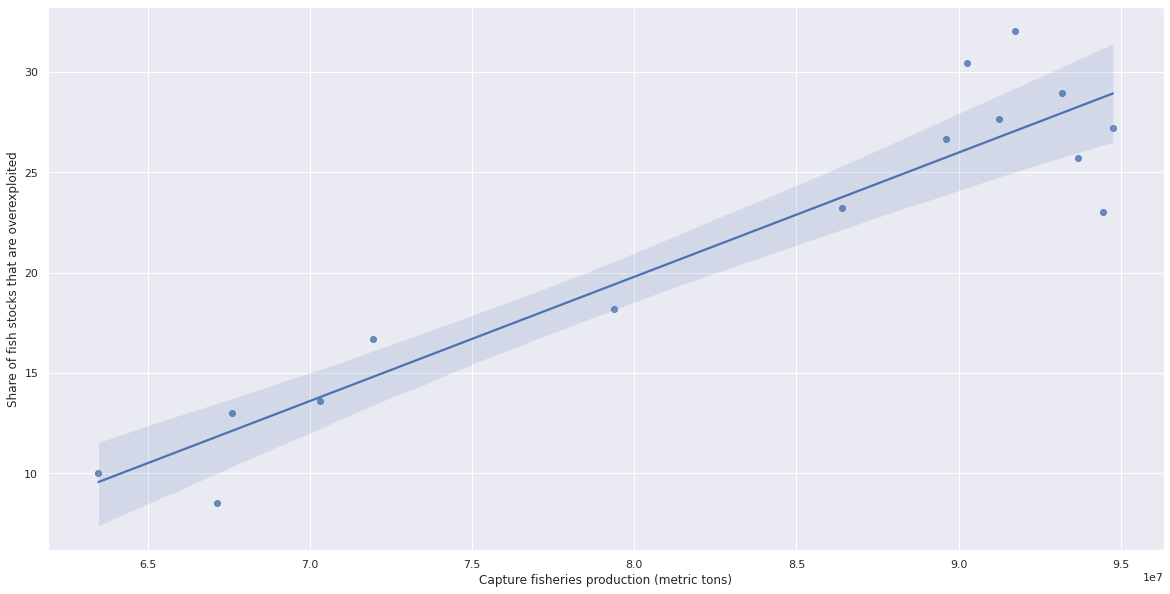

In [122]:
import seaborn as sns
sns.regplot(x=train['Capture fisheries production (metric tons)'], y=train['Share of fish stocks that are overexploited']).set_title('');

In [177]:
from category_encoders import OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# (참고) warning 제거를 위한 코드
np.seterr(divide='ignore', invalid='ignore')

target = 'Share of fish stocks that are overexploited'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    #StandardScaler(), 
    SelectKBest(f_regression, k=5),
    DecisionTreeRegressor()
)

# 4-fold 교차검증을 수행합니다.
k = 4
scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')

print(f'MAE ({k} folds):', -scores)

MAE (4 folds): [2.01195735 0.95007863 2.07848334 1.20800896]


In [174]:
X_train.isnull().sum()

Entity                                                                     0
Code_x                                                                     0
Year                                                                       0
Aquaculture production (metric tons)                                       0
Capture fisheries production (metric tons)                                 0
age                                                                        0
Code_y                                                                     0
Share of fish stocks within biologically sustainable levels (FAO, 2020)    0
dtype: int64

In [175]:
-scores.mean()

2.087458645

In [176]:
scores.std() # 표준편차 구하기

1.5917817347223249

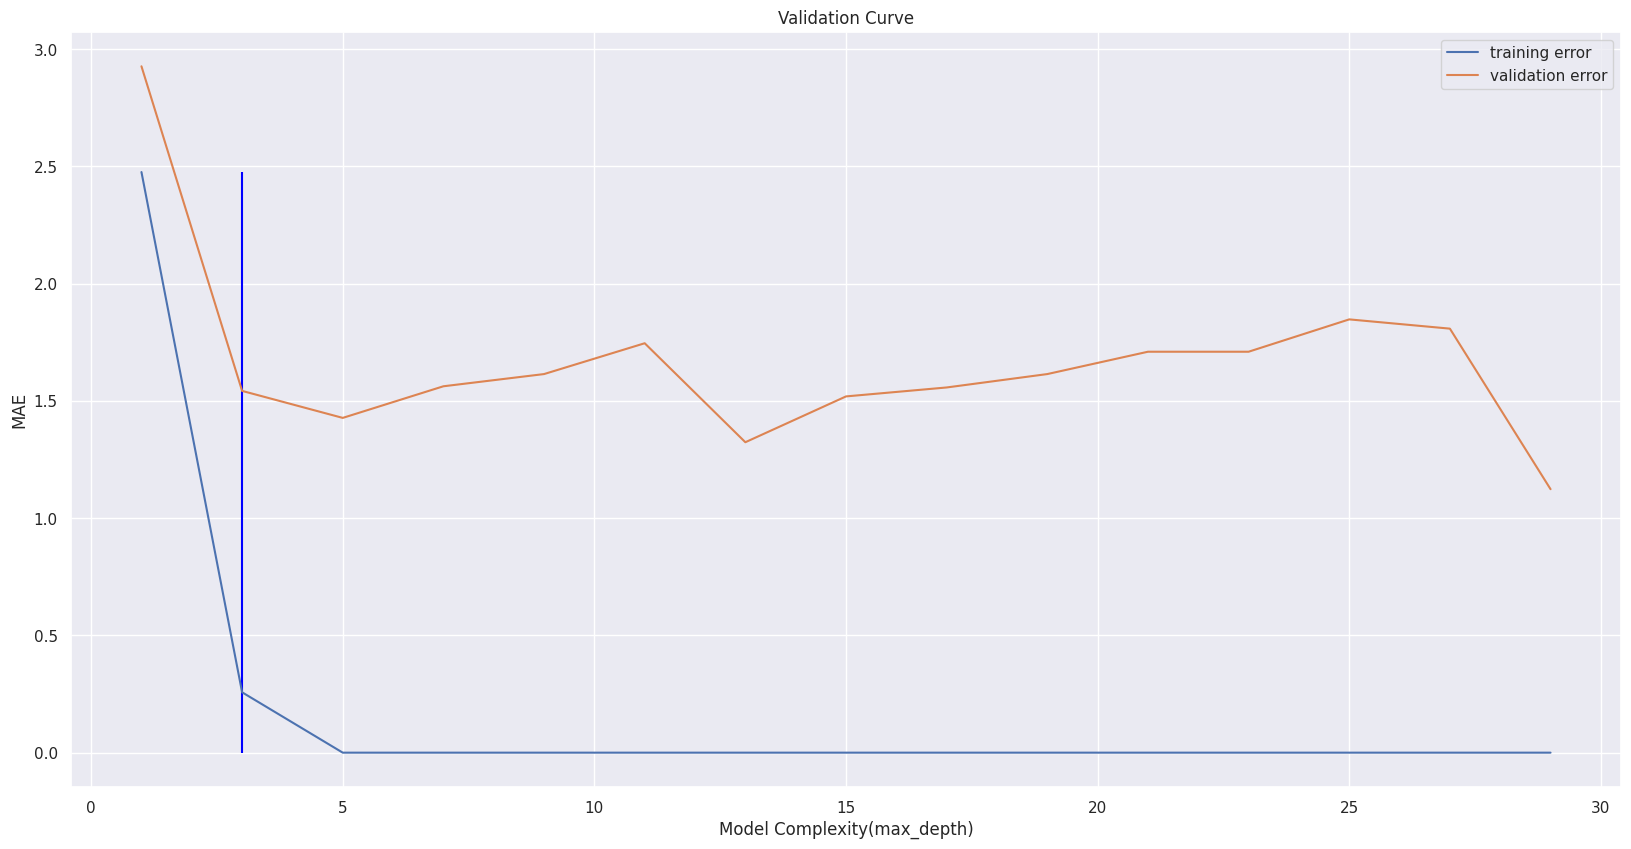

In [126]:
#검증곡선을 그립니다.
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    DecisionTreeRegressor()
)

depth = range(1, 30, 2)
ts, vs = validation_curve(
    pipe, X_train, y_train
    , param_name='decisiontreeregressor__max_depth'
    , param_range=depth, scoring='neg_mean_absolute_error'
    , cv=4
    , n_jobs=-1
)

train_scores_mean = np.mean(-ts, axis=1)
validation_scores_mean = np.mean(-vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')

# 이상적인 max_depth
ax.vlines(3,0, train_scores_mean.max(), color='blue')

# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='MAE')
ax.legend()
fig.dpi = 100

In [127]:
from sklearn.model_selection import GridSearchCV # import 
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state =2)
params=  {'max_depth': [None,2,3,4,6,8,10,20],
         'min_samples_leaf' : [None,2,3,4,6,8,10,20]}
grid_reg = GridSearchCV(reg,params, scoring ='neg_mean_squared_error',
cv=5,n_jobs=-1)
grid_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 6, 8, 10, 20],
                         'min_samples_leaf': [None, 2, 3, 4, 6, 8, 10, 20]},
             scoring='neg_mean_squared_error')

In [128]:
print('최적 하이퍼파라미터: ', grid_reg.best_params_)
print('MAE: ', -grid_reg.best_score_)

최적 하이퍼파라미터:  {'max_depth': None, 'min_samples_leaf': 2}
MAE:  4.224184403444298


In [129]:
X_train.columns

Index(['Entity', 'Code_x', 'Year', 'Aquaculture production (metric tons)',
       'Capture fisheries production (metric tons)', 'age', 'Code_y',
       'Share of fish stocks within biologically sustainable levels (FAO, 2020)'],
      dtype='object')

R2 0.7666484001271775


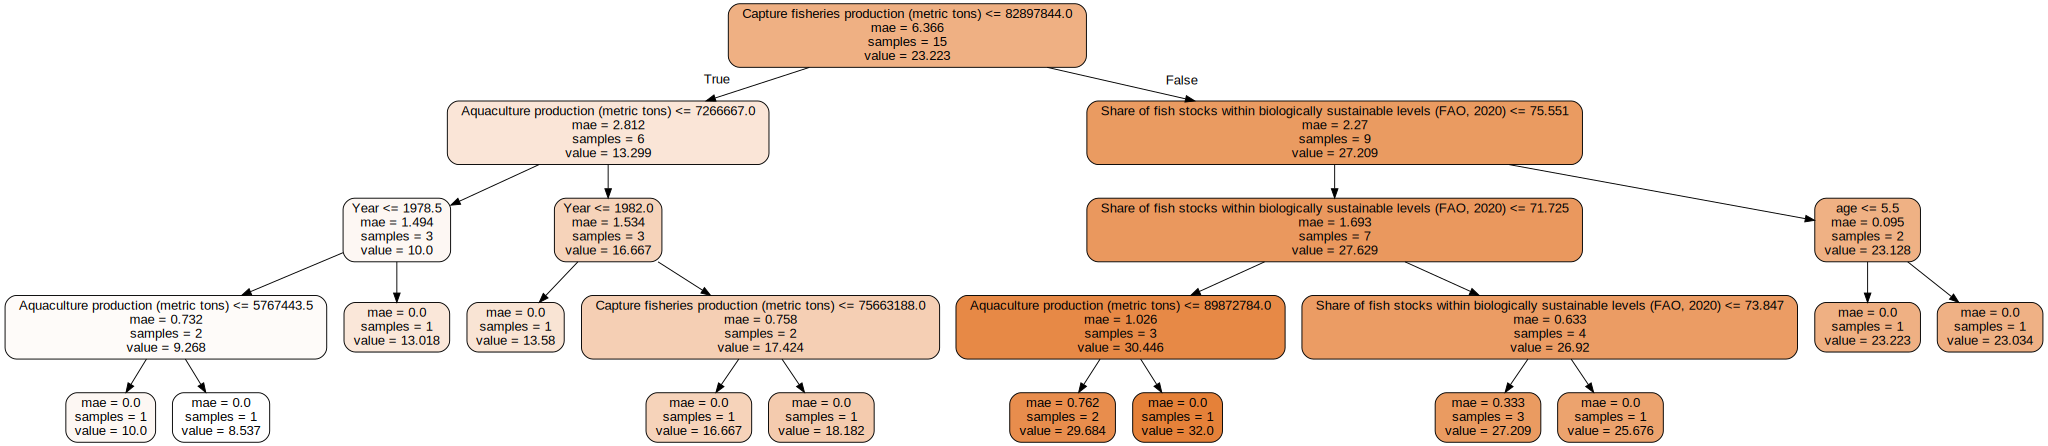

In [130]:
import graphviz
## jupyterlab 사용시: jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 트리구조 그리는 함수
def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="mae",max_depth=4, random_state=2)
tree.fit(X_train, y_train)
print('R2', tree.score(X_test, y_test))
show_tree(tree, colnames=X_test.columns)

In [131]:
#글로벌 어업 어획량을 통해 폐기량 예측하는 모델을 만듭니다.
df5=df5[df5['Year'] >= 1969] 
df5['Year'].unique()


array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [132]:
df5

,Entity,Code,Year,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence
19,World,OWID_WRL,1969,12211407,12761884,52626777,445673,3889378
20,World,OWID_WRL,1970,12365128,12754841,58881353,480642,3937638
21,World,OWID_WRL,1971,12398298,12685805,58293316,508341,3976718
22,World,OWID_WRL,1972,12753562,12357980,51789011,522985,3983958
23,World,OWID_WRL,1973,13688372,12031176,51308375,548785,3957258
24,World,OWID_WRL,1974,13309012,11416434,56720856,583018,3866687
25,World,OWID_WRL,1975,13432664,11313080,55854975,594247,3808464
26,World,OWID_WRL,1976,13761132,11095856,59084000,632334,3911536
27,World,OWID_WRL,1977,13892726,10889729,59241222,653480,4062986
28,World,OWID_WRL,1978,14360786,10872136,62623483,689377,4029281


In [133]:
df5.shape


(42, 8)

In [134]:
#그룹을 묶어줍니다. 위와 같이 데이터가 많지 않아서 유의미한 결과는 내기 어려울 것으로 보입니다.
#이에, 제가 정한 대립가설은 파기되고 귀무가설을 유지해야합니다.
group1=df1.merge(df5, on=['Entity','Year'], how='inner')

In [135]:
import category_encoders
from sklearn.preprocessing import OrdinalEncoder
encoder = category_encoders.OrdinalEncoder()
encoder = encoder.fit(group1)
encoded = encoder.transform(group1)
encoder.inverse_transform(encoded)
group1=encoded

In [136]:
group1

,Entity,Code_x,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,Code_y,Artisanal (small-scale commercial),Discards,Industrial (large-scale commercial),Recreational,Subsistence
0,1,1,1969,3.238166e+06,5.790321e+07,1,1,12211407,12761884,52626777,445673,3889378
1,1,1,1970,3.526017e+06,6.388682e+07,1,1,12365128,12754841,58881353,480642,3937638
2,1,1,1971,3.930472e+06,6.391791e+07,1,1,12398298,12685805,58293316,508341,3976718
3,1,1,1972,4.280803e+06,5.967060e+07,1,1,12753562,12357980,51789011,522985,3983958
4,1,1,1973,4.504942e+06,6.022730e+07,1,1,13688372,12031176,51308375,548785,3957258
5,1,1,1974,4.941524e+06,6.347042e+07,1,1,13309012,11416434,56720856,583018,3866687
6,1,1,1975,5.219603e+06,6.294113e+07,1,1,13432664,11313080,55854975,594247,3808464
7,1,1,1976,5.408491e+06,6.632803e+07,2,1,13761132,11095856,59084000,632334,3911536
8,1,1,1977,6.282015e+06,6.508362e+07,2,1,13892726,10889729,59241222,653480,4062986
9,1,1,1978,6.593363e+06,6.711575e+07,2,1,14360786,10872136,62623483,689377,4029281


In [137]:
train = group1.sample(frac=0.75,random_state=2)
test = group1.drop(train.index)
group1_t =test

In [138]:
len(train), len(test)

(32, 10)

In [139]:
# 다중모델 학습을 위한 특성
#features = whole2.drop(target, axis=1)
features = ['Capture fisheries production (metric tons)']
X_train = train[features]
X_test = test[features]

target = ['Discards']
y_train = train[target]
y_test = test[target]

predict = y_train.mean()
predict



Discards    1.274225e+07
dtype: float64

In [140]:
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')

훈련 에러: 1783091.91


In [141]:
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 2236846.81


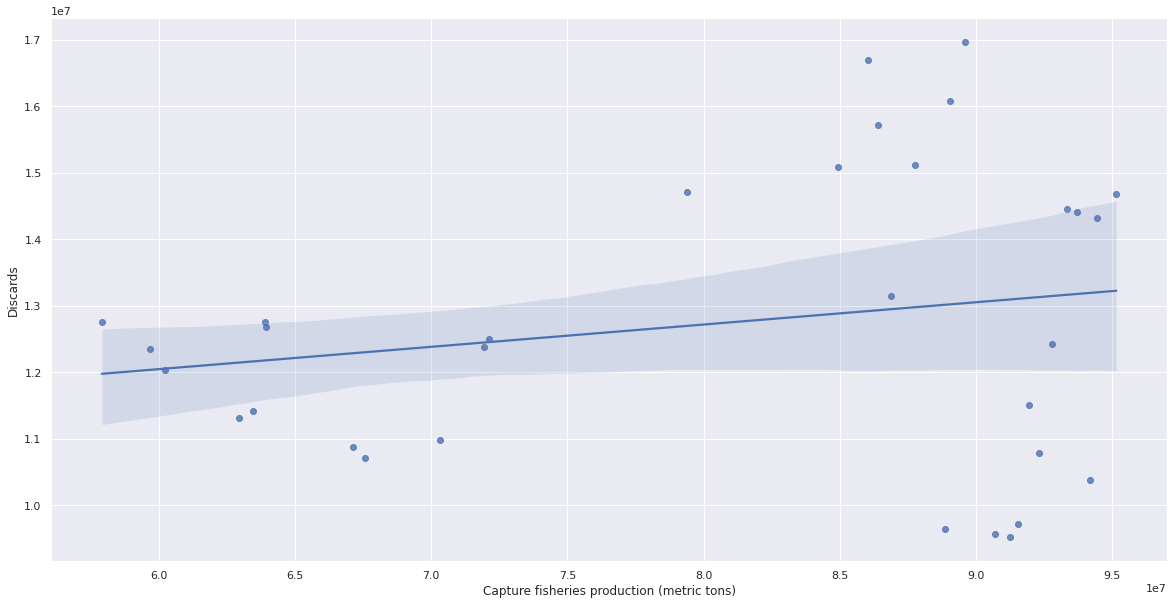

In [142]:
import seaborn as sns
sns.regplot(x=train['Capture fisheries production (metric tons)'], y=train['Discards']).set_title('');

In [143]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['Entity',	'Code_x','Year','Aquaculture production (metric tons)','Capture fisheries production (metric tons)','age',	'Code_y',	'Artisanal (small-scale commercial)','Industrial (large-scale commercial)','Recreational',	'Subsistence']
X_train = train[features]
X_test = test[features]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 762929.62


In [144]:
# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')


테스트 에러: 1095481.06


In [145]:
from sklearn.tree import DecisionTreeRegressor

pipe = make_pipeline(  
    SimpleImputer(), 
    DecisionTreeRegressor(min_samples_leaf=16, random_state=42)
)

pipe.fit(X_train, y_train)
print('훈련 정확도: ', pipe.score(X_train, y_train))
print('검증 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.5656224061858708
검증 정확도:  0.46256162667022915


R2 0.9785811348864765


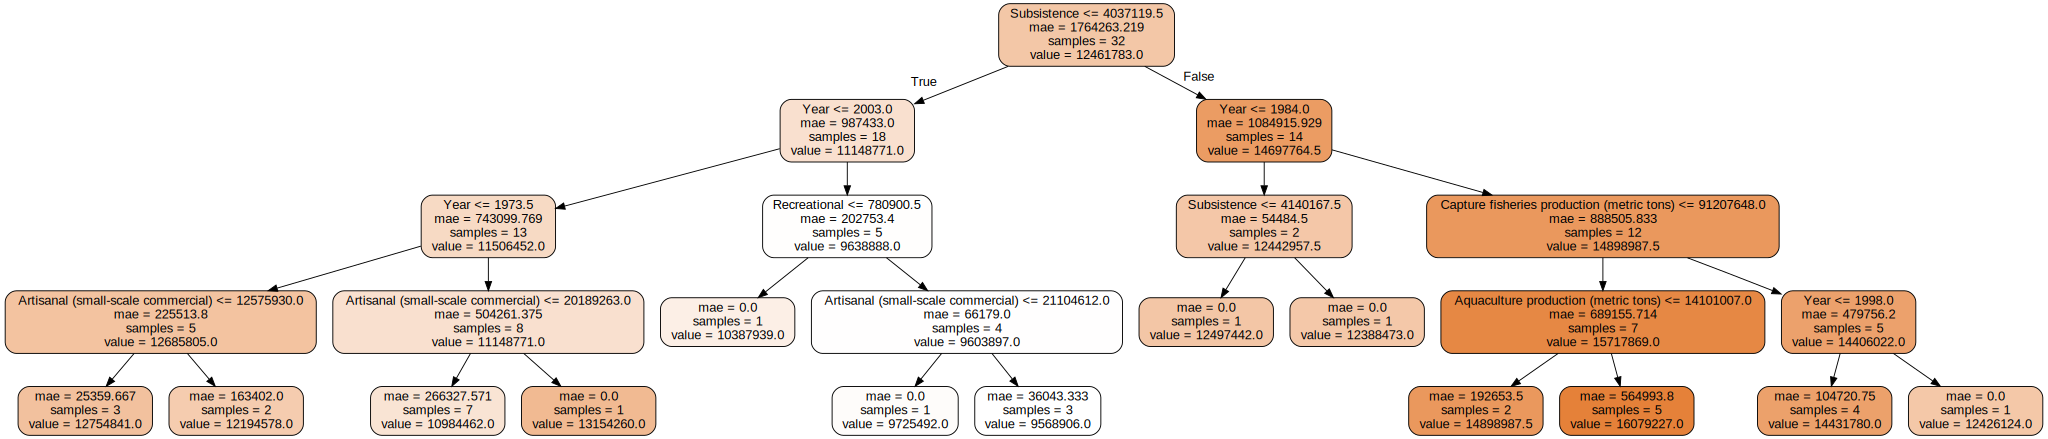

In [146]:
import graphviz
## jupyterlab 사용시: jupyter labextension install @jupyter-widgets/jupyterlab-manager
from ipywidgets import interact
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# 트리구조 그리는 함수
def show_tree(tree, colnames):
    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
    return graphviz.Source(dot)

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(criterion="mae",max_depth=4, random_state=2)
tree.fit(X_train, y_train)
print('R2', tree.score(X_train, y_train))
show_tree(tree, colnames=X_train.columns)

In [147]:
pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Capture fisheries production (metric tons)'

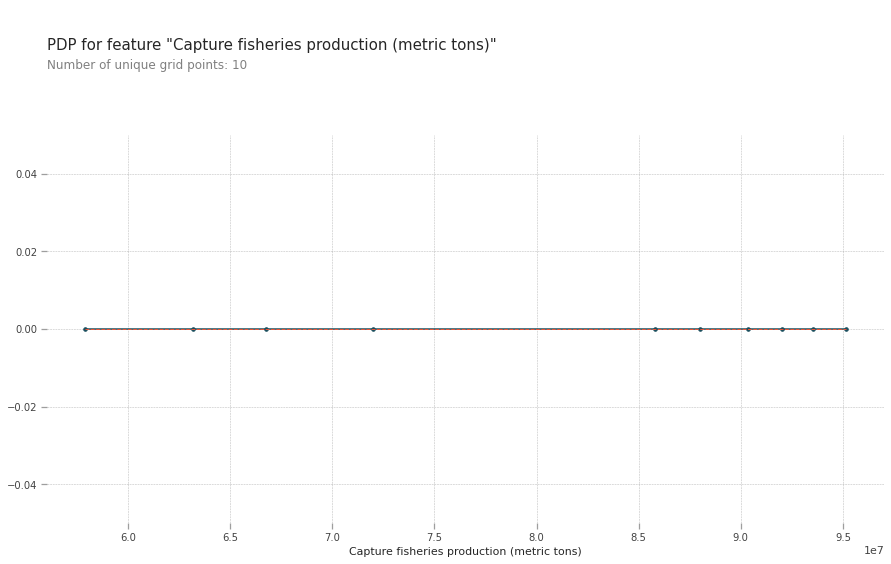

In [149]:
isolated = pdp_isolate(
    model=pipe, 
    dataset= X_train, 
    model_features= X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [150]:
row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,Entity,Code_x,Year,Aquaculture production (metric tons),Capture fisheries production (metric tons),age,Code_y,Artisanal (small-scale commercial),Industrial (large-scale commercial),Recreational,Subsistence
8,1,1,1977,6282015.0,65083617.0,2,1,13892726,59241222,653480,4062986


In [151]:
# 실제 집값
y_test.iloc[[1]] # 2번째 데이터를 사용했습니다

,Discards
8,10889729


In [152]:
# 모델 예측값
model.predict(row)

array([[12009942.33616388]])

In [153]:
# 모델이 이렇게 예측한 이유를 알기 위하여
# SHAP Force Plot을 그려보겠습니다.
!pip install shap
import shap

explainer = shap.TreeExplainer(pipe['decisiontreeregressor'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features= row
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [154]:
# 100개 테스트 샘플에 대해서 각 특성들의 영향을 봅니다. 샘플 수를 너무 크게 잢으면 계산이 오래걸리니 주의하세요.
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100])

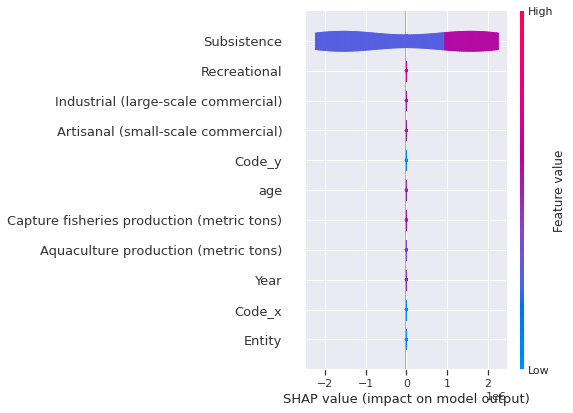

In [155]:
shap_values = explainer.shap_values(X_test.iloc[:300])
shap.summary_plot(shap_values, X_test.iloc[:300], plot_type="violin")
